# I. Wprowadzenie

### 1. Zakres Badania

#### Temat badania:


> Analiza wpływu czynników demograficzno-ekonomicznych na wysokosć wydatków konsumpcyjnych oraz preferencji dotyczących rodzaju sklepu, towaru, form promocji oraz czynników mających wpływ na  decyzje zakupowe.

###  Co to jest analiza EDA?"


::: {.callout-tip}
- Analiza deskrypcyjna to proces badania, opisywania i interpretacji danych w celu uzyskania wglądu i zrozumienia ich cech, wzorców i związków. 
Jest to technika często stosowana w dziedzinach naukowych, badań społecznych, statystyce, lingwistyce i wielu innych dziedzinach.
Głównym celem analizy deskrypcyjnej jest opisanie i podsumowanie danych w sposób, który ujawnia istotne informacje. 
Może obejmować takie elementy jak obliczanie średnich, median, odchyleń standardowych, minimalnych i maksymalnych wartości, oraz prezentowanie danych w postaci tabel, wykresów lub grafów.
- Analiza deskrypcyjna umożliwia identyfikację kluczowych cech, trendów, anomalii i relacji w danych. Może również pomóc w odkrywaniu wzorców, porównywaniu grup lub kategorii danych oraz wyprowadzaniu wniosków na podstawie zebranych informacji.
Głównym celem EDA jest zapewnienie wglądu w dane jeszcze przed sformułowaniem jakichkolwiek założeń. 
Pomaga identyfikować oczywiste błędy, lepiej pojmować wzorce występujące w obrębie danych, wykrywać wartości odstające i anomalie, a także odnajdywać interesujące relacje między zmiennymi.
Po przeprowadzeniu analizy EDA i uzyskaniu istotnych spostrzeżeń wciąż można wykorzystać tę metodę do bardziej zaawansowanej analizy danych lub modelowania, w tym na potrzeby uczenia maszynowego.
:::




In [227]:

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from scipy.stats import zscore
import re
import math
warnings.filterwarnings("ignore")
from IPython.display import display, Markdown
import polars as pl
pd.set_option('display.max_colwidth', None)
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from IPython.display import Markdown, display
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# II. Analiza danych

#### 1. Załadowanie danych po procesie porządkowania i czyszczenia danych

In [228]:
baza = pd.read_excel('baza.xlsx')

Wyświetlenie 5 pierwszych wierszy tabeli

In [229]:
display(baza.head())

,płeć,wiek,wykształcenie,liczba osób w rodzinie,typ sklepu,towar,rodzaj promocji,czynnik zakupowy,dochody roczne,wydatki roczne,dochody mc,wydatki mc,dochody mc na osobę,wydatki mc na osobę,udział wydatkow w dochodach,poziom dochodów,poziom wydatków,wielkosć miasta
0,m,23-39,podstawowe,2,bazarek,napoje,inne,cena,54000.00,9000.00,4500,750,2250,375,17,bardzo wysoki,niski,51 tys.-200 tys.
1,m,14-22,podstawowe,1,bazarek,warzywa,gazetka,inne,43333.30,10221.50,3611,852,3611,852,24,wysoki,średni,51 tys.-200 tys.
2,m,40-65,podstawowe,1,bazarek,pieczywo,reklama rtv,jakość,50000.00,10221.50,4167,852,4167,852,20,bardzo wysoki,średni,51 tys.-200 tys.
3,m,> 66,podstawowe,1,osiedlowy,pieczywo,gazetka,jakość,45000.00,6084.00,3750,507,3750,507,14,wysoki,niski,51 tys.-200 tys.
4,m,23-39,zawodowe,5,osiedlowy,mięso i wędliny,gazetka,jakość,28000.00,9000.00,2333,750,467,150,32,niski,niski,51 tys.-200 tys.


In [230]:

def analiza_dataframe(df):
    # Liczba kolumn
    liczba_kolumn = len(df.columns)
    
    # Liczba wierszy
    liczba_wierszy = len(df)
    
    # Liczba kolumn numerycznych, tekstowych, dat i boolowskich
    liczba_kolumn_numerycznych = len(df.select_dtypes(include='number').columns)
    liczba_kolumn_textowych = len(df.select_dtypes(include='object').columns)
    liczba_kolumn_dat = len(df.select_dtypes(include='datetime').columns)
    liczba_kolumn_bool = len(df.select_dtypes(include='bool').columns)

    # Tworzenie DataFrame z wynikami
    wyniki = pd.DataFrame({
        'Liczba kolumn': [liczba_kolumn],
        'Liczba wierszy': [liczba_wierszy],
        'Liczba kolumn numerycznych': [liczba_kolumn_numerycznych],
        'Liczba kolumn tekstowych': [liczba_kolumn_textowych],
        'Liczba kolumn dat': [liczba_kolumn_dat],
        'Liczba kolumn bool': [liczba_kolumn_bool]
    })
    
    return wyniki




def informacje_o_dataframe(df):
    informacje = []

    for kolumna in df.columns:
        typ_kolumny = df[kolumna].dtype
        unikalne_wartosci = df[kolumna].nunique()
        puste_wartosci = df[kolumna].isnull().sum()
        niepuste_wartosci = df[kolumna].count()
        unikalne_wartosci_lista = df[kolumna].unique()
        informacje.append([kolumna, typ_kolumny, unikalne_wartosci, puste_wartosci, niepuste_wartosci,unikalne_wartosci_lista])

    informacje_df = pd.DataFrame(informacje, columns=['Nazwa kolumny', 'Typ kolumny', 'Liczba unikalnych wartości', 'Liczba wartości pustych', 'Liczba wartości niepustych', 'wartosci unikatowe'])
    return informacje_df

display(Markdown("**Informacja o tabelach:**"))
print()

display(analiza_dataframe(baza))
print()
display(informacje_o_dataframe(baza))

**Informacja o tabelach:**

,Liczba kolumn,Liczba wierszy,Liczba kolumn numerycznych,Liczba kolumn tekstowych,Liczba kolumn dat,Liczba kolumn bool
0,18,125,8,10,0,0


,Nazwa kolumny,Typ kolumny,Liczba unikalnych wartości,Liczba wartości pustych,Liczba wartości niepustych,wartosci unikatowe
0,płeć,object,2,0,125,"[m, k]"
1,wiek,object,4,0,125,"[23-39, 14-22, 40-65, > 66]"
2,wykształcenie,object,4,0,125,"[podstawowe, zawodowe, średnie, wyższe]"
3,liczba osób w rodzinie,int64,5,0,125,"[2, 1, 5, 4, 3]"
4,typ sklepu,object,4,0,125,"[bazarek, osiedlowy, supermarket, galeria]"
5,towar,object,7,0,125,"[napoje, warzywa, pieczywo, mięso i wędliny, art. zbożowe, słodycze, nabiał]"
6,rodzaj promocji,object,6,0,125,"[inne, gazetka , reklama rtv, karta , email , nie korzystam]"
7,czynnik zakupowy,object,4,0,125,"[cena, inne, jakość, marka]"
8,dochody roczne,float64,30,0,125,"[54000.0, 43333.3, 50000.0, 45000.0, 28000.0, 29000.0, 42000.0, 30000.0, 31000.0, 32000.0, 34000.0, 35000.0, 38000.0, 39000.0, 40000.0, 41000.0, 33000.0, 43000.0, 44000.0, 46000.0, 47000.0, 48000.0, 49000.0, 51000.0, 52000.0, 36000.0, 57000.0, 59000.0, 60000.0, 61000.0]"
9,wydatki roczne,float64,93,0,125,"[9000.0, 10221.5, 6084.0, 6672.0, 6756.0, 7800.0, 7080.0, 7092.0, 7284.0, 7872.0, 8004.0, 8028.0, 8184.0, 8244.0, 8280.0, 8292.0, 8460.0, 8544.0, 8556.0, 8772.0, 8880.0, 8904.0, 8952.0, 8976.0, 9036.0, 9060.0, 9084.0, 9132.0, 9144.0, 9228.0, 9252.0, 9336.0, 9396.0, 9408.0, 9432.0, 9504.0, 9612.0, 9648.0, 9696.0, 9780.0, 9792.0, 9876.0, 9912.0, 9948.0, 9972.0, 9996.0, 10128.0, 10140.0, 10152.0, 10260.0, 10356.0, 10380.0, 10500.0, 10512.0, 10536.0, 10572.0, 10608.0, 10620.0, 10692.0, 10752.0, 10776.0, 10812.0, 10920.0, 11136.0, 11160.0, 11172.0, 11232.0, 11268.0, 11292.0, 11316.0, 11340.0, 11364.0, 11472.0, 11532.0, 11544.0, 11616.0, 11784.0, 11808.0, 11832.0, 11856.0, 11904.0, 11976.0, 12024.0, 12132.0, 12240.0, 12492.0, 12732.0, 12792.0, 12936.0, 13248.0, 13560.0, 13968.0, 14172.0]"


## 2. Analiza jednowymiarowa

Podział zmiennych wg rodzaju

In [231]:
# Wybór zmiennych liczbowych
zmienne_liczbowe = baza.select_dtypes(include='number').columns.tolist()

# Wybór zmiennych tekstowych
zmienne_textowe = baza.select_dtypes(include=['object', 'category']).columns.tolist()

display(Markdown(f"**Zmienna liczbowe:**  {zmienne_liczbowe}"))
display(Markdown(f"**Zmienna tekstowe:**  {zmienne_textowe}"))

**Zmienna liczbowe:**  ['liczba osób w rodzinie', 'dochody roczne', 'wydatki roczne', 'dochody mc', 'wydatki mc', 'dochody mc na osobę', 'wydatki mc na osobę', 'udział wydatkow w dochodach']

**Zmienna tekstowe:**  ['płeć', 'wiek', 'wykształcenie', 'typ sklepu', 'towar', 'rodzaj promocji', 'czynnik zakupowy', 'poziom dochodów', 'poziom wydatków', 'wielkosć miasta']

### **2.1. Zmienne numeryczne**

#### 2.1.2 Tabele liczebności i częstości

In [232]:

def tabela_rozdzielcza_przedzialy(series, bins):
    count, bin_edges = np.histogram(series, bins=bins)
    freq = count / len(series)
    cum_count = np.cumsum(count)
    cum_freq = np.cumsum(freq)
    bin_labels = [f"({int(bin_edges[i])}, {int(bin_edges[i+1])}]" for i in range(len(bin_edges)-1)]
    return pd.DataFrame({'przedział': bin_labels, 'liczebność': count, 'liczebność skumulowana': cum_count, 'częstość': freq, 'częstość skumulowana': cum_freq})

display(Markdown(f"**Tabela rozdzielcza zmiennej DOCHODY:**"))
display(tabela_rozdzielcza_przedzialy(baza[ 'dochody mc'], 5))
print()



display(Markdown(f"**Tabela rozdzielcza zmiennej WYDATKI:**"))
display(tabela_rozdzielcza_przedzialy(baza[ 'wydatki mc'], 5))

**Tabela rozdzielcza zmiennej DOCHODY:**

,przedział,liczebność,liczebność skumulowana,częstość,częstość skumulowana
0,"(2333, 2883]",15,15,0.12,0.12
1,"(2883, 3433]",36,51,0.29,0.41
2,"(3433, 3983]",39,90,0.31,0.72
3,"(3983, 4533]",27,117,0.22,0.94
4,"(4533, 5083]",8,125,0.06,1.00


**Tabela rozdzielcza zmiennej WYDATKI:**

,przedział,liczebność,liczebność skumulowana,częstość,częstość skumulowana
0,"(507, 641]",6,6,0.05,0.05
1,"(641, 776]",32,38,0.26,0.30
2,"(776, 911]",48,86,0.38,0.69
3,"(911, 1046]",27,113,0.22,0.90
4,"(1046, 1181]",12,125,0.10,1.00


In [233]:
from scipy.stats import skew, kurtosis
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import display_html, Markdown, display


def display_side_by_side(*dfs, margin='50px', titles=None):
  
    html_str = ""
    for i, df in enumerate(dfs):
        # Jeśli lista tytułów została podana i zawiera tytuł dla danej tabeli, dodajemy go nad tabelą
        title_html = ""
        if titles is not None and i < len(titles):
            title_html = f'<h4 style="text-align:center; margin-bottom:5px;">{titles[i]}</h4>'
        # Każdy DataFrame jest owinięty w <div> z ustawionym marginesem
        html_str += (
            f'<div style="display: inline-block; margin-right: {margin}; vertical-align: top;">'
            f'{title_html}'
            f'{df.to_html(classes="dataframe", border=1)}'
            f'</div>'
        )
    display_html(html_str, raw=True)


pd.options.display.float_format = '{:.2f}'.format

def statystyki(df, zmienna, wykres):
    """
    Oblicza statystyki opisowe dla wybranej zmiennej w DataFrame.

    Parametry:
    df (DataFrame): DataFrame pandas
    zmienna (str): Nazwa kolumny w DataFrame, dla której obliczane są statystyki.

    Zwraca:
    Słownik z DataFrames: Każdy DataFrame zawiera obliczone statystyki dla określonego rodzaju miar.
    """
    x = df[zmienna].dropna()

    # Obliczenia statystyk opisowych
    liczba = x.count()
    braki = df[zmienna].isna().sum()
    suma = x.sum()
    min_val = x.min()
    max_val = x.max()
    mediana = round(x.median(), 2)
    srednia = round(x.mean(), 2)
    rozstep = round(max_val - min_val, 2)
    Q_5 = round(np.quantile(x, 0.05), 2)
    Q_10 = round(np.quantile(x, 0.1), 2)
    Q1_25 = round(np.quantile(x, 0.25), 2)
    Q2_50 = mediana
    Q3_75 = round(np.quantile(x, 0.75), 2)
    Q_90 = round(np.quantile(x, 0.9), 2)
    Q_95 = round(np.quantile(x, 0.95), 2)
    IQR = round(Q3_75 - Q1_25, 2)
    interdecyl = round(Q_95 - Q_5, 2)
    odch_cwiar = round((Q3_75 - Q1_25) / 2, 2)
    odchylenie_przecietne = round((np.abs(x - x.mean()).mean() / x.mean()) * 100, 2)
    mad = round(np.mean(np.abs(x - x.mean())), 2)
    mad_med = round(np.median(np.abs(x - np.median(x))), 2)
    wariancja = round(np.var(x, ddof=1), 2)
    odch_std = round(np.std(x, ddof=1), 2)
    wariancja_pop = round(np.var(x, ddof=0), 2)
    odch_std_pop = round(np.std(x, ddof=0), 2)
    blad_odch_std = round(np.std(x, ddof=1) / np.sqrt(liczba), 2)
    kl_wsp_zmien = round(np.std(x, ddof=1) / x.mean(), 2)
    poz_wsp_zmien = round((Q3_75 - Q1_25) / mediana, 2)
    skosnosc = round(x.skew(), 2)
    kurtoza_eksces = round(x.kurtosis(), 2)
    skosnosc_Pearson_2 = round(3 * (x.mean() - mediana) / np.std(x, ddof=1), 2)
    moment_centralny_3 = round(np.mean((x - x.mean())**3), 2)
    moment_centralny_4 = round(np.mean((x - x.mean())**4), 2)
    moment_surowy_3 = round(np.mean(x**3), 2)
    moment_surowy_4 = round(np.mean(x**4), 2)

    odch_std_obs = np.std(x)
    srednia_obs = np.mean(x)
    Me = np.median(x)
    Q_val = (np.quantile(x, 0.75) - np.quantile(x, 0.25)) / 2
    kl_obszar_zm_L = round(srednia_obs - odch_std_obs, 2)
    kl_obszar_zm_P = round(srednia_obs + odch_std_obs, 2)
    poz_obszar_zm_L = round(Me - Q_val, 2)
    poz_obszar_zm_P = round(Me + Q_val, 2)

    # Tworzenie listy z obszarami zmienności
    obszary_zmienności = [
        f"Klasyczny: ({kl_obszar_zm_L}, {kl_obszar_zm_P})",
        f"Pozycyjny: ({poz_obszar_zm_L}, {poz_obszar_zm_P})"
    ]

    # Słownik z danymi
    miary_polozenia = {
        'srednia': srednia,
        'mediana': mediana,
        'Q_5%': Q_5,
        'Q_10%': Q_10,
        'Q1_25%': Q1_25,
        'Q2_50%': Q2_50,
        'Q3_75%': Q3_75,
        'Q_90%': Q_90,
        'Q_95%': Q_95
    }

    miary_zmienności = {
        'rozstęp': rozstep,
        'IQR': IQR,
        'interdecyl': interdecyl,
        'odch_cwiar': odch_cwiar,
        'odchylenie przeciętne (%)': odchylenie_przecietne,
        'mad': mad,
        'mad_med': mad_med,
        'wariancja (próbkowa)': wariancja,
        'odch_std (próbkowy)': odch_std,
        'wariancja (populacyjna)': wariancja_pop,
        'odch_std (populacyjny)': odch_std_pop,
        'błąd_odch_std': blad_odch_std,
        'kl_wsp_zmien': kl_wsp_zmien,
        'poz_wsp_zmien': poz_wsp_zmien
    }

    miary_asymetrii = {
        'skośność': skosnosc,
        'skośność_Pearson_2': skosnosc_Pearson_2,

    }

    miary_spłaszczenia = {
        'kurtoza_eksces': kurtoza_eksces,

    }

    # Tworzenie DataFrames
    wyniki_polozenia = pd.DataFrame(miary_polozenia, index=[zmienna]).T
    wyniki_zmienności = pd.DataFrame(miary_zmienności, index=[zmienna]).T
    wyniki_asymetrii = pd.DataFrame(miary_asymetrii, index=[zmienna]).T
    wyniki_spłaszczenia = pd.DataFrame(miary_spłaszczenia, index=[zmienna]).T

    # Dodanie obszarów zmienności jako DataFrame
    obszary_zmienności = pd.DataFrame({'Obszary zmienności': obszary_zmienności}, index=['Klasyczny', 'Pozycyjny'])




        # Zwrócenie słownika z DataFrames
    return {
            'Miary położenia': wyniki_polozenia,
            'Miary zmienności': wyniki_zmienności,
            'Miary asymetrii': wyniki_asymetrii,
            'Miary spłaszczenia': wyniki_spłaszczenia,
            'Obszary zmienności': obszary_zmienności
       }





def plot_various_charts(df, variable):
    # Ustawienie figure z pięcioma subplotami
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))
    
    # Histogram z KDE
    sns.histplot(df[variable], ax=axs[0], kde=True)
    axs[0].set_title('Histogram z KDE')
    axs[0].spines['top'].set_visible(False)  # Usuń górne obramowanie
    axs[0].spines['right'].set_visible(False)  # Usuń prawe obramowanie
    
    # Boxplot
    sns.boxplot(df[variable], ax=axs[1])
    axs[1].set_title('Boxplot')
    axs[1].spines['top'].set_visible(False)  # Usuń górne obramowanie
    axs[1].spines['right'].set_visible(False)  # Usuń prawe obramowanie
    
    # Violin plot
    sns.violinplot(df[variable], ax=axs[2])
    axs[2].set_title('Violin plot')
    axs[2].spines['top'].set_visible(False)  # Usuń górne obramowanie
    axs[2].spines['right'].set_visible(False)  # Usuń prawe obramowanie
    
    # QQ plot
    stats.probplot(df[variable], plot=axs[3])
    axs[3].set_title('QQ plot')
    axs[3].spines['top'].set_visible(False)  # Usuń górne obramowanie
    axs[3].spines['right'].set_visible(False)  # Usuń prawe obramowanie

    
    plt.tight_layout()
    plt.show()

from scipy.stats import shapiro, kstest, normaltest, skewtest, kurtosistest, jarque_bera
import statsmodels.api as sm
import pandas as pd


def testy_normalnosci(x, alpha):
    """
    Funkcja wykonuje serię testów normalności dla danej próbki i zwraca wyniki w DataFrame.

    Args:
        x (Series lub array-like): Próbka danych, dla której testowana jest normalność.

    Returns:
        DataFrame: DataFrame zawierający wyniki testów normalności, statystyki testowe oraz wartości p z oznaczeniem istotności.
    """

    wyniki_testow = []
    
    def oznacz_p_wartosc(p):
        if p < 0.001:
            return f"{p:.8f} ***"
        elif p < 0.01:
            return f"{p:.8f} **"
        elif p < 0.05:
            return f"{p:.8f} *"
        else:
            return f"{p:.8f}"

    # Test Shapiro-Wilka
    stat_shapiro, p_shapiro = shapiro(x)
    wniosek_shapiro = "rozkład normalny" if p_shapiro > alpha else "brak rozkładu normalnego"
    interpretacja_shapiro = f"Test Shapiro-Wilka wskazuje na {'istotne' if p_shapiro < alpha else 'nieistotne'} odchylenie od normalności. Wartość p={p_shapiro:.8f} jest {'bardzo mała' if p_shapiro < 0.001 else 'mała' if p_shapiro < 0.01 else 'umiarkowana' if p_shapiro < 0.05 else 'duża'}."
    wyniki_testow.append({
        'Test': 'Shapiro-Wilk',
        'Statystyka': stat_shapiro,
        'P-value': oznacz_p_wartosc(p_shapiro),
        'Wniosek': wniosek_shapiro,
        'Interpretacja': interpretacja_shapiro
    })

    # Test Lillieforsa (Kołmogorowa-Smirnowa z estymowanymi parametrami)
    stat_lillie, p_lillie = sm.stats.diagnostic.lilliefors(x, 'norm')
    wniosek_lillie = "rozkład normalny" if p_lillie > alpha else "brak rozkładu normalnego"
    interpretacja_lillie = f"Test Lillieforsa wskazuje na {'istotne' if p_lillie < alpha else 'nieistotne'} odchylenie od normalności. Wartość p={p_lillie:.8f} jest {'bardzo mała' if p_lillie < 0.001 else 'mała' if p_lillie < 0.01 else 'umiarkowana' if p_lillie < 0.05 else 'duża'}."
    wyniki_testow.append({
        'Test': 'Lilliefors (Kołmogorow-Smirnow)',
        'Statystyka': stat_lillie,
        'P-value': oznacz_p_wartosc(p_lillie),
        'Wniosek': wniosek_lillie,
        'Interpretacja': interpretacja_lillie
    })

    # Testy D’Agostino-Pearsona, skośności i kurtozy
    if len(x) >= 8:
        stat_dagostino, p_dagostino = normaltest(x)
        wniosek_dagostino = "rozkład normalny" if p_dagostino > alpha else "brak rozkładu normalnego"
        interpretacja_dagostino = f"Test D’Agostino-Pearsona wskazuje na {'istotne' if p_dagostino < alpha else 'nieistotne'} odchylenie od normalności. Wartość p={p_dagostino:.8f} jest {'bardzo mała' if p_dagostino < 0.001 else 'mała' if p_dagostino < 0.01 else 'umiarkowana' if p_dagostino < 0.05 else 'duża'}."
        wyniki_testow.append({
            'Test': 'D’Agostino-Pearson',
            'Statystyka': stat_dagostino,
            'P-value': oznacz_p_wartosc(p_dagostino),
            'Wniosek': wniosek_dagostino,
            'Interpretacja': interpretacja_dagostino
        })

        stat_skosnosc, p_skosnosc = skewtest(x)
        wniosek_skosnosc = "rozkład normalny (symetria)" if p_skosnosc > alpha else "brak rozkładu normalnego (asymetria)"
        interpretacja_skosnosc = f"Test skośności wskazuje na {'istotną' if p_skosnosc < alpha else 'nieistotną'} asymetrię. Wartość p={p_skosnosc:.8f} jest {'bardzo mała' if p_skosnosc < 0.001 else 'mała' if p_skosnosc < 0.01 else 'umiarkowana' if p_skosnosc < 0.05 else 'duża'}."
        wyniki_testow.append({
            'Test': 'Skośność',
            'Statystyka': stat_skosnosc,
            'P-value': oznacz_p_wartosc(p_skosnosc),
            'Wniosek': wniosek_skosnosc,
            'Interpretacja': interpretacja_skosnosc
        })

        stat_kurtoza, p_kurtoza = kurtosistest(x)
        wniosek_kurtoza = "rozkład normalny (kurtoza)" if p_kurtoza > alpha else "brak rozkładu normalnego (kurtoza)"
        interpretacja_kurtoza = f"Test kurtozy wskazuje na {'istotne' if p_kurtoza < alpha else 'nieistotne'} odchylenie od normalności. Wartość p={p_kurtoza:.8f} jest {'bardzo mała' if p_kurtoza < 0.001 else 'mała' if p_kurtoza < 0.01 else 'umiarkowana' if p_kurtoza < 0.05 else 'duża'}."
        wyniki_testow.append({
            'Test': 'Kurtoza',
            'Statystyka': stat_kurtoza,
            'P-value': oznacz_p_wartosc(p_kurtoza),
            'Wniosek': wniosek_kurtoza,
            'Interpretacja': interpretacja_kurtoza
        })

    # Test Jarque-Bera
    stat_jb, p_jb = jarque_bera(x)
    wniosek_jb = "rozkład normalny" if p_jb > alpha else "brak rozkładu normalnego"
    interpretacja_jb = f"Test Jarque-Bera wskazuje na {'istotne' if p_jb < alpha else 'nieistotne'} odchylenie od normalności. Wartość p={p_jb:.8f} jest {'bardzo mała' if p_jb < 0.001 else 'mała' if p_jb < 0.01 else 'umiarkowana' if p_jb < 0.05 else 'duża'}."
    wyniki_testow.append({
        'Test': 'Jarque-Bera',
        'Statystyka': stat_jb,
        'P-value': oznacz_p_wartosc(p_jb),
        'Wniosek': wniosek_jb,
        'Interpretacja': interpretacja_jb
    })

    df_wyniki = pd.DataFrame(wyniki_testow)
    return df_wyniki



import numpy as np
import scipy.stats as stats
import pandas as pd
import altair as alt
import numpy as np
import scipy.stats as stats
import pandas as pd
import altair as alt

def analiza_przedzialow_ufnosci(df, zmienna, alfa=0.05, n_bootstrap=1000, tabela=True, wykres=True):

    data = df[zmienna].dropna().values  # Usunięcie braków danych

    # Funkcje pomocnicze
    def przedzial_ufnosci_srednia(data):
        n = len(data)
        srednia = np.mean(data)
        sem = stats.sem(data)
        t = stats.t.ppf(1 - alfa/2, n - 1)
        return srednia, (srednia - t * sem, srednia + t * sem)

    def przedzial_ufnosci_odchylenie(data):
        n = len(data)
        s = np.std(data, ddof=1)
        chi2_lower = stats.chi2.ppf(alfa/2, n - 1)
        chi2_upper = stats.chi2.ppf(1 - alfa/2, n - 1)
        return s, (np.sqrt((n - 1) * s**2 / chi2_upper), np.sqrt((n - 1) * s**2 / chi2_lower))



    def przedzial_ufnosci_bootstrap(stat_func, data):
        bootstrap_stats = [stat_func(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
        estymator = stat_func(data)
        return estymator, (np.percentile(bootstrap_stats, 100 * alfa/2), np.percentile(bootstrap_stats, 100 * (1 - alfa/2)))

    # Obliczenia
    srednia, przedzial_srednia = przedzial_ufnosci_srednia(data)
    odchylenie, przedzial_odchylenie = przedzial_ufnosci_odchylenie(data)
    mediana, przedzial_mediana = przedzial_ufnosci_bootstrap(np.median, data)


    # Tworzenie DataFrame
    df_wyniki = pd.DataFrame({
        'Statystyka': ['Średnia', 'Odchylenie standardowe',  'Mediana'],
        'Wartość': [srednia, odchylenie, mediana],
        'Dolna granica': [przedzial_srednia[0], przedzial_odchylenie[0],przedzial_mediana[0]],
        'Górna granica': [przedzial_srednia[1], przedzial_odchylenie[1], przedzial_mediana[1]],
        'Poziom alfa': [alfa]*3
    })

    # Zaokrąglenie do 2 miejsc po przecinku
    df_wyniki[['Wartość', 'Dolna granica', 'Górna granica']] = df_wyniki[['Wartość', 'Dolna granica', 'Górna granica']].round(2)


    if tabela:
        display(df_wyniki)

    if wykres:
        # Tworzenie wykresów Altair
        def create_chart(stat_name):
            sub_df = df_wyniki[df_wyniki['Statystyka'] == stat_name]
            return alt.Chart(sub_df).mark_point(size=100, filled=True, color='steelblue').encode(
                x=alt.X('Statystyka', sort=None, axis=None),
                y=alt.Y('Wartość', title='Wartość', scale=alt.Scale(zero=False))
            ) + alt.Chart(sub_df).mark_errorbar(extent='ci').encode(
                x=alt.X('Statystyka', axis=None),
                y='Dolna granica',
                y2='Górna granica'
            ).properties(width=100, height=200)

        wykresy = []
        for stat in df_wyniki['Statystyka']:
            wykresy.append(create_chart(stat).properties(title=f"Przedział ufności dla {stat}"))

        # Łączenie wykresów w siatkę z niezależnymi osiami Y
        wykresy_altair = alt.hconcat(*wykresy).resolve_scale(y='independent')

        return df_wyniki, wykresy_altair

    return df_wyniki



# wyniki_df, wykres = analiza_przedzialow_ufnosci(baza, 'dochody mc', alfa=0.05, tabela=True, wykres=True)
# wykres.display()




#### 2.1.1 Podstawowe statystyki

In [234]:

display(Markdown(f"**Statystyki dla zmiennej - dochody mc:**"))


wyniki = statystyki(baza, 'dochody mc', wykres = True)



display_side_by_side(wyniki['Miary położenia'], 
                     wyniki['Miary zmienności'], 
                     wyniki['Miary asymetrii'],
                     wyniki['Miary spłaszczenia'],
                     wyniki['Obszary zmienności'],
                     titles=["Miary położenia", "Miary zmienności", "Miary asymetrii", "Miary spłaszczenia", "Obszary zmiennosći"])

print()


display(Markdown(f"**Statystyki dla zmiennej - wydatki mc:**"))


wyniki = statystyki(baza, 'wydatki mc', wykres = True)



display_side_by_side(wyniki['Miary położenia'], 
                     wyniki['Miary zmienności'], 
                     wyniki['Miary asymetrii'],
                     wyniki['Miary spłaszczenia'],
                     wyniki['Obszary zmienności'],
                     titles=["Miary położenia", "Miary zmienności", "Miary asymetrii", "Miary spłaszczenia", "Obszary zmiennosći"])

**Statystyki dla zmiennej - dochody mc:**

,dochody mc
srednia,3611.17
mediana,3583.00
Q_5%,2599.80
Q_10%,2833.00
Q1_25%,3167.00
Q2_50%,3583.00
Q3_75%,4000.00
Q_90%,4500.00
Q_95%,4750.00
,dochody mc


**Statystyki dla zmiennej - wydatki mc:**

,wydatki mc
srednia,851.80
mediana,852.00
Q_5%,650.00
Q_10%,669.00
Q1_25%,753.00
Q2_50%,852.00
Q3_75%,945.00
Q_90%,1041.00
Q_95%,1075.60
,wydatki mc


#### 2.1.2 Testy normalności rozkładu

In [235]:


display(Markdown(f"**Testy normalnosci dla zmiennej -  dochody mc:**"))

display(testy_normalnosci(baza['dochody mc'], alpha = 0.05))
print()

display(Markdown(f"**Testy normalnosci dla zmiennej - wydatki mc:**"))

display(testy_normalnosci(baza['wydatki mc'], alpha = 0.05))



**Testy normalnosci dla zmiennej -  dochody mc:**

,Test,Statystyka,P-value,Wniosek,Interpretacja
0,Shapiro-Wilk,0.98,0.03053066 *,brak rozkładu normalnego,Test Shapiro-Wilka wskazuje na istotne odchylenie od normalności. Wartość p=0.03053066 jest umiarkowana.
1,Lilliefors (Kołmogorow-Smirnow),0.09,0.02422610 *,brak rozkładu normalnego,Test Lillieforsa wskazuje na istotne odchylenie od normalności. Wartość p=0.02422610 jest umiarkowana.
2,D’Agostino-Pearson,4.55,0.10269769,rozkład normalny,Test D’Agostino-Pearsona wskazuje na nieistotne odchylenie od normalności. Wartość p=0.10269769 jest duża.
3,Skośność,1.02,0.30931416,rozkład normalny (symetria),Test skośności wskazuje na nieistotną asymetrię. Wartość p=0.30931416 jest duża.
4,Kurtoza,-1.88,0.06069360,rozkład normalny (kurtoza),Test kurtozy wskazuje na nieistotne odchylenie od normalności. Wartość p=0.06069360 jest duża.
5,Jarque-Bera,3.05,0.21715157,rozkład normalny,Test Jarque-Bera wskazuje na nieistotne odchylenie od normalności. Wartość p=0.21715157 jest duża.


**Testy normalnosci dla zmiennej - wydatki mc:**

,Test,Statystyka,P-value,Wniosek,Interpretacja
0,Shapiro-Wilk,0.99,0.81939954,rozkład normalny,Test Shapiro-Wilka wskazuje na nieistotne odchylenie od normalności. Wartość p=0.81939954 jest duża.
1,Lilliefors (Kołmogorow-Smirnow),0.05,0.78160501,rozkład normalny,Test Lillieforsa wskazuje na nieistotne odchylenie od normalności. Wartość p=0.78160501 jest duża.
2,D’Agostino-Pearson,0.54,0.76205283,rozkład normalny,Test D’Agostino-Pearsona wskazuje na nieistotne odchylenie od normalności. Wartość p=0.76205283 jest duża.
3,Skośność,0.42,0.67808743,rozkład normalny (symetria),Test skośności wskazuje na nieistotną asymetrię. Wartość p=0.67808743 jest duża.
4,Kurtoza,-0.61,0.54235523,rozkład normalny (kurtoza),Test kurtozy wskazuje na nieistotne odchylenie od normalności. Wartość p=0.54235523 jest duża.
5,Jarque-Bera,0.69,0.70977614,rozkład normalny,Test Jarque-Bera wskazuje na nieistotne odchylenie od normalności. Wartość p=0.70977614 jest duża.


#### 2.1.2 Przedziały ufności dla wybranych statystyk

In [236]:
display(Markdown(f"**Przedziały ufności dla wybranych miar zmiennej - dochody mc:**"))
wyniki_df, wykres = analiza_przedzialow_ufnosci(baza, 'dochody mc', alfa=0.05, tabela=True, wykres=True)
wykres.display()

print()
display(Markdown(f"**Przedziały ufności dla wybranych miar zmiennej - wydatki mc:**"))
wyniki_df, wykres = analiza_przedzialow_ufnosci(baza, 'wydatki mc', alfa=0.05, tabela=True, wykres=True)
wykres.display()



**Przedziały ufności dla wybranych miar zmiennej - dochody mc:**

,Statystyka,Wartość,Dolna granica,Górna granica,Poziom alfa
0,Średnia,3611.17,3496.06,3726.28,0.05
1,Odchylenie standardowe,650.23,578.39,742.60,0.05
2,Mediana,3583.00,3500.00,3667.00,0.05


alt.HConcatChart(...)

**Przedziały ufności dla wybranych miar zmiennej - wydatki mc:**

,Statystyka,Wartość,Dolna granica,Górna granica,Poziom alfa
0,Średnia,851.80,826.99,876.61,0.05
1,Odchylenie standardowe,140.15,124.67,160.06,0.05
2,Mediana,852.00,829.00,875.00,0.05


alt.HConcatChart(...)

#### 2.1.3 Wykresy rozkładu zmiennych numerycznych

**Wykresy zmiennej dochody mc:**

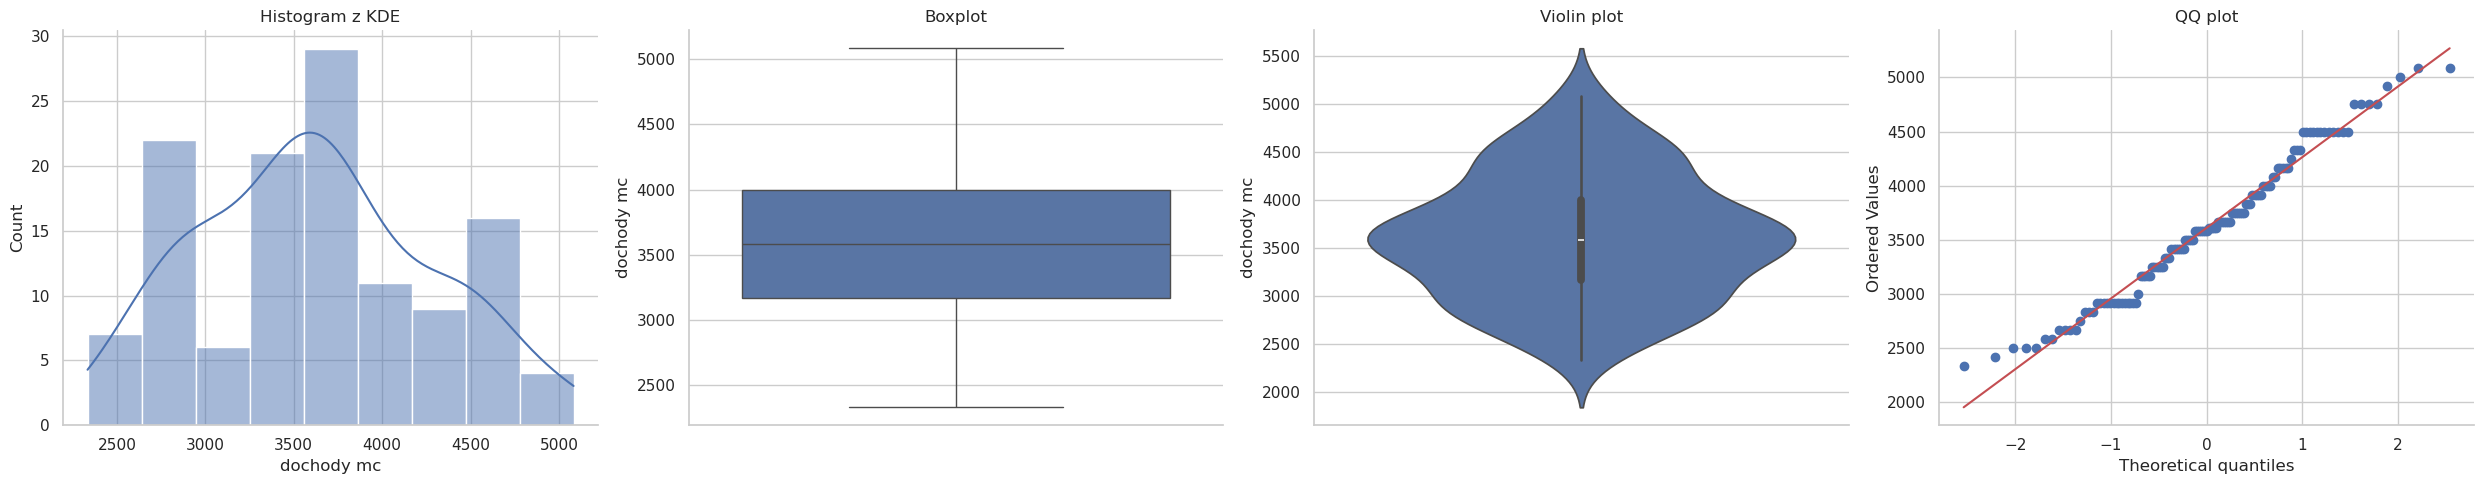

**Wykresy zmiennej wydatki mc:**

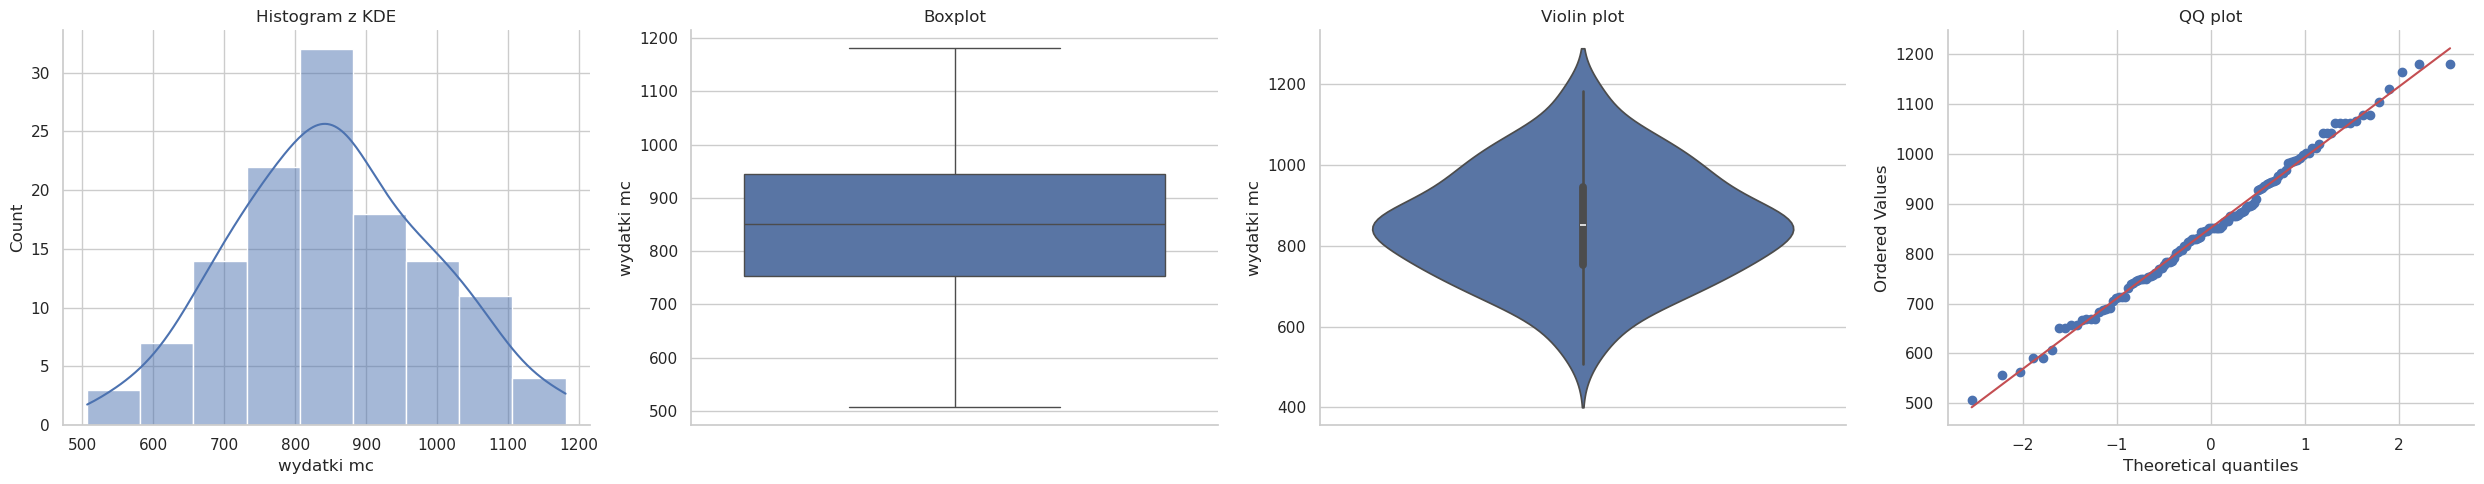

In [237]:

display(Markdown(f"**Wykresy zmiennej dochody mc:**"))
plot_various_charts(baza, 'dochody mc')


display(Markdown(f"**Wykresy zmiennej wydatki mc:**"))
plot_various_charts(baza, 'wydatki mc')


### **2.2. Zmienne nominalne**

Analiza zmiennej : [płeć]

,Kategoria,Liczebność,Procent
0,k,85,68.00
1,m,40,32.00
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.90,Maksymalna różnorodność
1,Indeks Gini,0.43,Dominacja pojedynczych kategorii
2,Wskaźnik Simpsona,0.56,Umiarkowana koncentracja
3,Dominanta,k (85),None
4,Liczba kategorii,2,None
5,Unikalne wartości,"[k, m]",None


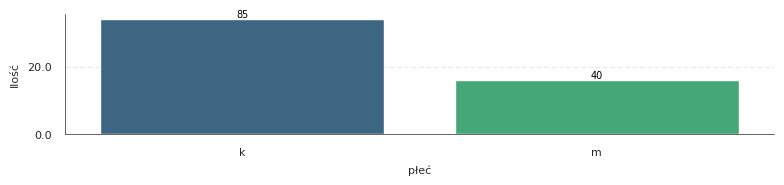

Analiza zmiennej : [wiek]

,Kategoria,Liczebność,Procent
0,40-65,52,41.60
1,23-39,34,27.20
2,> 66,27,21.60
3,14-22,12,9.60
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.92,Maksymalna różnorodność
1,Indeks Gini,0.70,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.30,Równomierny rozkład
3,Dominanta,40-65 (52),None
4,Liczba kategorii,4,None


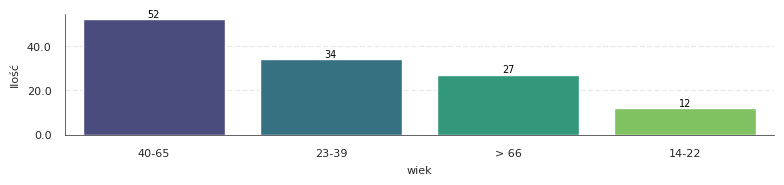

Analiza zmiennej : [wykształcenie]

,Kategoria,Liczebność,Procent
0,wyższe,73,58.40
1,średnie,26,20.80
2,zawodowe,16,12.80
3,podstawowe,10,8.00
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.80,Wysoka różnorodność
1,Indeks Gini,0.59,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.41,Umiarkowana koncentracja
3,Dominanta,wyższe (73),None
4,Liczba kategorii,4,None


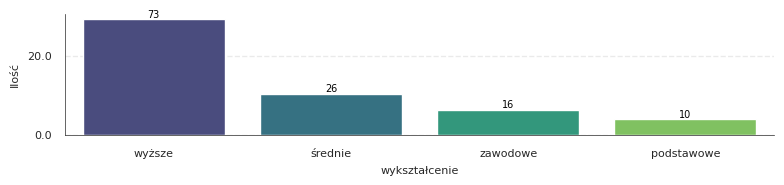

Analiza zmiennej : [typ sklepu]

,Kategoria,Liczebność,Procent
0,supermarket,38,30.40
1,osiedlowy,30,24.00
2,bazarek,29,23.20
3,galeria,28,22.40
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.99,Maksymalna różnorodność
1,Indeks Gini,0.75,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.25,Równomierny rozkład
3,Dominanta,supermarket (38),None
4,Liczba kategorii,4,None


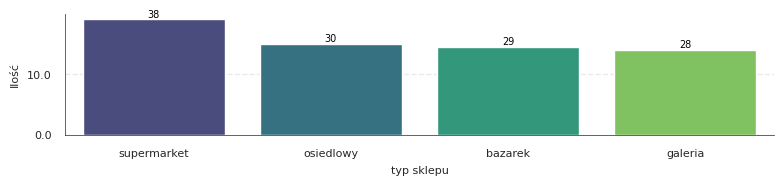

Analiza zmiennej : [towar]

,Kategoria,Liczebność,Procent
0,pieczywo,23,18.40
1,warzywa,22,17.60
2,mięso i wędliny,20,16.00
3,nabiał,19,15.20
4,napoje,18,14.40
5,słodycze,12,9.60
6,art. zbożowe,11,8.80
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.98,Maksymalna różnorodność
1,Indeks Gini,0.85,Bardzo równomierny rozkład


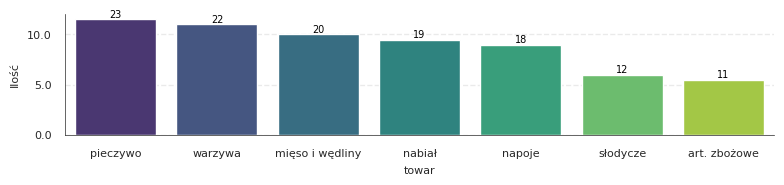

Analiza zmiennej : [rodzaj promocji]

,Kategoria,Liczebność,Procent
0,gazetka,45,36.00
1,reklama rtv,34,27.20
2,nie korzystam,19,15.20
3,karta,14,11.20
4,inne,10,8.00
5,email,3,2.40
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.86,Maksymalna różnorodność
1,Indeks Gini,0.75,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.25,Równomierny rozkład


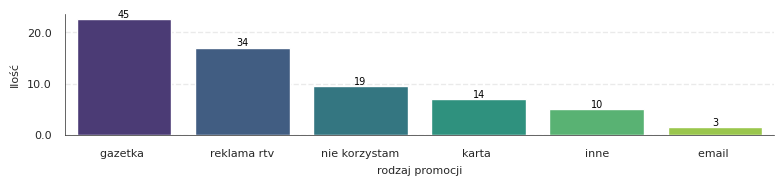

Analiza zmiennej : [czynnik zakupowy]

,Kategoria,Liczebność,Procent
0,jakość,47,37.60
1,cena,38,30.40
2,marka,21,16.80
3,inne,19,15.20
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.95,Maksymalna różnorodność
1,Indeks Gini,0.71,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.28,Równomierny rozkład
3,Dominanta,jakość (47),None
4,Liczba kategorii,4,None


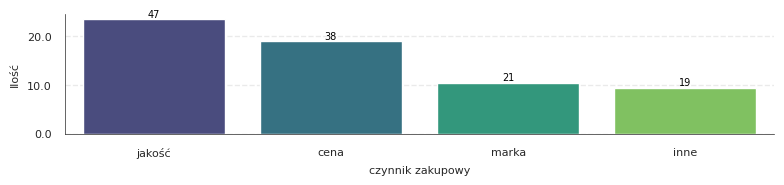

Analiza zmiennej : [poziom dochodów]

,Kategoria,Liczebność,Procent
0,niski,35,28.00
1,bardzo wysoki,31,24.80
2,wysoki,31,24.80
3,średni,28,22.40
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,1.00,Maksymalna różnorodność
1,Indeks Gini,0.75,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.25,Równomierny rozkład
3,Dominanta,niski (35),None
4,Liczba kategorii,4,None


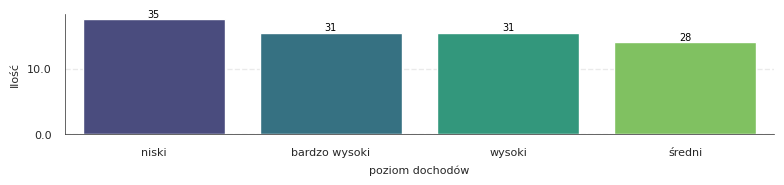

Analiza zmiennej : [poziom wydatków]

,Kategoria,Liczebność,Procent
0,średni,36,28.80
1,niski,32,25.60
2,bardzo wysoki,31,24.80
3,wysoki,26,20.80
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.99,Maksymalna różnorodność
1,Indeks Gini,0.75,Zróżnicowany rozkład
2,Wskaźnik Simpsona,0.25,Równomierny rozkład
3,Dominanta,średni (36),None
4,Liczba kategorii,4,None


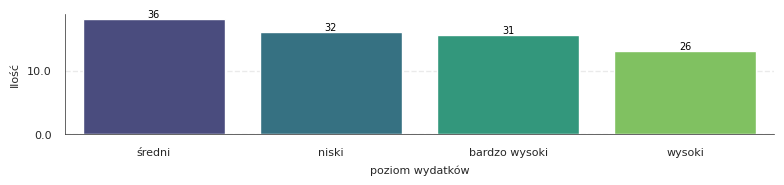

Analiza zmiennej : [wielkosć miasta]

,Kategoria,Liczebność,Procent
0,51 tys.-200 tys.,90,72.00
1,201 tys.-500 tys.,24,19.20
2,pow 500 tys.,7,5.60
3,<50 tys.,4,3.20
,Miara,Wartość,Interpretacja
0,Znormalizowana Entropia,0.59,Wysoka różnorodność
1,Indeks Gini,0.44,Dominacja pojedynczych kategorii
2,Wskaźnik Simpsona,0.56,Umiarkowana koncentracja
3,Dominanta,51 tys.-200 tys. (90),None
4,Liczba kategorii,4,None


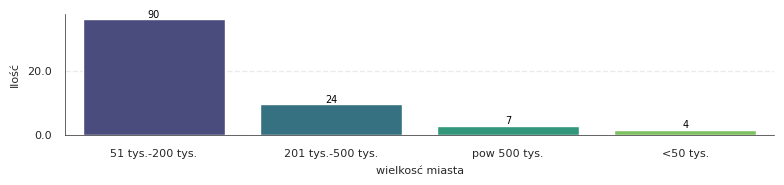

In [238]:
import pandas as pd
import numpy as np
import altair as alt
from IPython.core.display import display_html

def display_side_by_side(*dfs, margin='50px', titles=None):
    html_str = ""
    for i, df in enumerate(dfs):
        title_html = ""
        if titles is not None and i < len(titles):
            title_html = f'<h4 style="text-align:center; margin-bottom:5px;">{titles[i]}</h4>'
        html_str += (
            f'<div style="display: inline-block; margin-right: {margin}; vertical-align: top;">'
            f'{title_html}'
            f'{df.to_html(classes="dataframe", border=1)}'
            f'</div>'
        )
    display_html(html_str, raw=True)  # Wyświetlenie tabel

def tabela_liczebnosci_procent(df, zmienna_kat):
    if zmienna_kat not in df.columns:
        raise ValueError(f"Zmienna kategoryczna '{zmienna_kat}' nie występuje w DataFrame.")

    liczebnosci = df[zmienna_kat].value_counts().reset_index()
    liczebnosci.columns = ['Kategoria', 'Liczebność']

    procenty = df[zmienna_kat].value_counts(normalize=True) * 100
    procenty = procenty.round(2).reset_index()
    procenty.columns = ['Kategoria', 'Procent']

    tabela_wynikowa = pd.merge(liczebnosci, procenty, on='Kategoria')
    return tabela_wynikowa




import numpy as np
import pandas as pd
import numpy as np
import pandas as pd

def analyze_categorical_data(data, category_column):
    """
    Analizuje dane kategoryczne obliczając entropię, dominantę i miary zmienności.
    
    Args:
        data: DataFrame z danymi
        category_column: Nazwa kolumny do analizy
    
    Returns:
        DataFrame z wynikami i interpretacjami
    """
    # Sprawdzanie istnienia kolumny
    if category_column not in data.columns:
        raise ValueError(f"Kolumna '{category_column}' nie istnieje w DataFrame.")
    
    # Obliczenia podstawowe
    frequencies = data[category_column].value_counts()
    total = frequencies.sum()
    proportions = frequencies / total
    
    # Entropia i normalizacja
    entropy = -np.sum(proportions * np.log2(proportions + np.finfo(float).eps))
    max_entropy = np.log2(len(proportions)) if len(proportions) > 1 else 1
    normalized_entropy = entropy / max_entropy if len(proportions) > 1 else 0.0
    
    # Nowe miary zmienności
    gini_index = 1 - np.sum(proportions ** 2)
    simpson_index = np.sum(proportions ** 2)
    
    # Dominanta
    dominant_val = frequencies.idxmax()
    dominant_count = frequencies.max()
    
    # Słownik wyników
    results = {
        'Znormalizowana Entropia': normalized_entropy,
        'Indeks Gini': gini_index,
        'Wskaźnik Simpsona': simpson_index,
        'Dominanta': f"{dominant_val} ({dominant_count})",
        'Liczba kategorii': len(frequencies),
        'Unikalne wartości': frequencies.index.tolist()
    }
    
    # Tabela wynikowa z interpretacjami
    return pd.DataFrame({
        'Miara': list(results.keys()),
        'Wartość': [round(v, 3) if isinstance(v, (int, float)) else v for v in results.values()],
        'Interpretacja': [
            # Entropia
            "Maksymalna różnorodność" if normalized_entropy > 0.8 else
            "Wysoka różnorodność" if normalized_entropy > 0.5 else
            "Niska różnorodność",
            
            # Gini
            "Bardzo równomierny rozkład" if gini_index > 0.8 else
            "Zróżnicowany rozkład" if gini_index > 0.5 else
            "Dominacja pojedynczych kategorii",
            
            # Simpson
            "Wysoka koncentracja" if simpson_index > 0.7 else
            "Umiarkowana koncentracja" if simpson_index > 0.4 else
            "Równomierny rozkład",
            
            None,  # Dominanta
            None,  # Liczba kategorii
            None   # Unikalne wartości
        ]
    })






def generuj_wykresy(df, zmienna):
    # Obliczanie ilości i procentów
    ilosci = df[zmienna].value_counts().reset_index()
    ilosci.columns = ['Kategoria', 'Ilosc']
    
    # Ustawienia stylu Seaborn
    sns.set(style="white")
    
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(8, 2))
    sns.barplot(data=ilosci, x='Kategoria', y='Ilosc', palette='viridis', ax=ax)

    # Usunięcie górnej i prawej krawędzi
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ustawienia czcionek i osi
    ax.set_xlabel(zmienna, fontsize=8, labelpad=5)
    ax.set_ylabel("Ilość", fontsize=8, labelpad=5)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=0)
    ax.set_yticklabels(ax.get_yticks(), fontsize=8)

    # Usunięcie siatek, pozostawiając jedynie poziome linie pomocnicze
    ax.grid(axis='y', linestyle='dashed', alpha=0.4)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    # Dodanie wartości na słupkach
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=7, color='black')

    plt.tight_layout()
    plt.show()


tabela_liczebnosci = tabela_liczebnosci_procent(baza, 'płeć')
miary_zmiennosci = analyze_categorical_data(baza, 'płeć')



for zmienna in zmienne_textowe:
    tabela_liczebnosci = tabela_liczebnosci_procent(baza, zmienna)
    miary_zmiennosci = analyze_categorical_data(baza, zmienna)
    display(Markdown(f"Analiza zmiennej : [{zmienna}]"))
    display_side_by_side(tabela_liczebnosci, miary_zmiennosci, titles=[f"Tabela liczebności i częstości dla {zmienna}", f"Miary zmienności dla {zmienna}"])
    generuj_wykresy(baza, zmienna)

## 3. Analiza wielowymiarowa

### 3.1. Analiza zależnosci zmiennych numerycznych

Statystyki opisowe 
 
 
 
 dochody mc 
 wydatki mc 
 
 
 
 
 count 
 125.00 
 125.00 
 
 
 mean 
 3611.17 
 851.80 
 
 
 std 
 650.23 
 140.15 
 
 
 min 
 2333.00 
 507.00 
 
 
 25% 
 3167.00 
 753.00 
 
 
 50% 
 3583.00 
 852.00 
 
 
 75% 
 4000.00 
 945.00 
 
 
 max 
 5083.00 
 1181.00 
 
 
 Współczynniki korelacji 
 
 
 
 Metoda 
 Wartość 
 p-value 
 Istotność (alpha=0.05) 
 
 
 
 
 0 
 Pearson 
 0.76 
 0.00 
 True 
 
 
 1 
 Spearman 
 0.78 
 0.00 
 True 
 
 
 2 
 Kendall 
 0.71 
 0.00 
 True

Histogramy i wykresy density pozwalają ocenić centralną tendencję i rozproszenie danych.

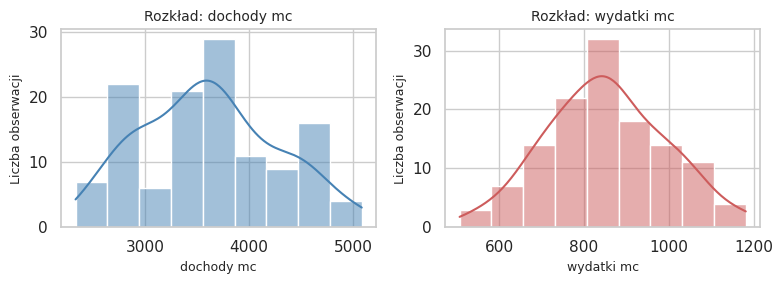

Interpretacja: Wartości bliskie 1 lub -1 oznaczają silną zależność, natomiast wartości bliskie 0 – słabą zależność

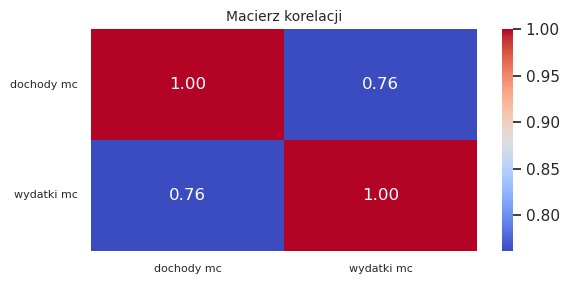

Heatmapa macierzy korelacji wizualnie przedstawia siłę i kierunek zależności między zmiennymi


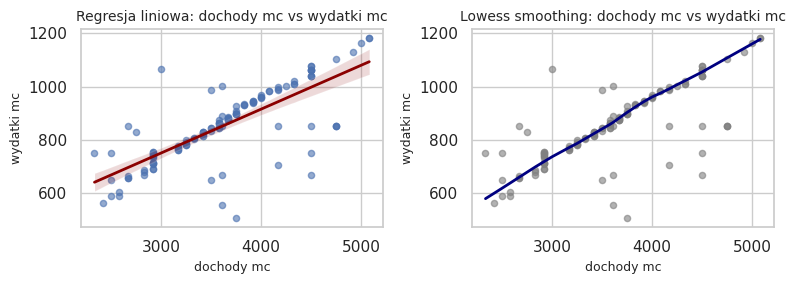

Scatter plot z linią regresji i wykres lowess pomagają wizualnie ocenić trend zależności między zmiennymi.

Dopasowano model regresji liniowej (OLS).
Tabela współczynników modelu OLS:


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,258.90,46.20,5.60,0.00,167.46,350.35
dochody mc,0.16,0.01,13.04,0.00,0.14,0.19


Interpretacja: Tabela zawiera estymowane współczynniki, statystyki t oraz p-value. Wysoka istotność (p < 0.05) wskazuje, że dany predyktor istotnie wpływa na zmienną zależną

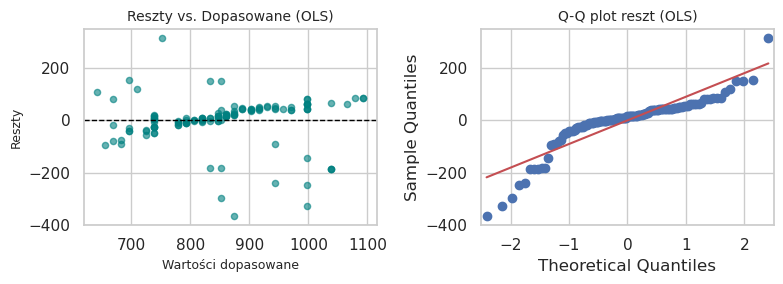

Wykres diagnostyczny (reszty vs. dopasowane oraz Q-Q plot) pomaga ocenić, czy założenia modelu (np. normalność reszt) są spełnione.



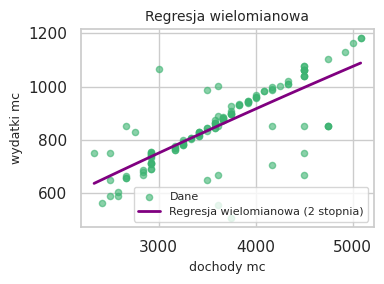

Wykres regresji wielomianowej ilustruje potencjalną nieliniowość zależności między zmiennymi

Tabela współczynników modelu regresji kwantylowej (mediana):


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,97.89,11.52,8.49,0.00,75.08,120.70
Q('dochody mc'),0.21,0.00,67.84,0.00,0.21,0.22


<IPython.core.display.Markdown object>
Tabela współczynników modelu regresji robustycznej (RLM):


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,114.38,10.82,10.57,0.00,93.18,135.58
dochody mc,0.21,0.00,70.72,0.00,0.20,0.21


Interpretacja: Model robustyczny jest mniej wrażliwy na wartości odstające, co pozwala na wiarygodną estymację parametrów nawet przy obecności anomalii.

Tabela wyników testu heteroskedastyczności (Breusch-Pagana):


,Wynik
Lagrange multiplier statistic,3.05
p-value,0.08
f-value,3.08
f p-value,0.08


Interpretacja: Jeśli p-value < 0.05, to wariancja reszt nie jest stała, co oznacza występowanie heteroskedastyczności.

Tabela Cook's Distance (wskaźnik wpływu obserwacji):


,Indeks,Cook's Distance
0,0,0.09
1,1,0.00
2,2,0.01
3,3,0.07
4,4,0.03
5,5,0.04
6,6,0.02
7,7,0.02
8,8,0.00
9,9,0.01


Interpretacja: Obserwacje z wartością Cook's Distance > 4/n mogą mieć nadmierny wpływ na model.



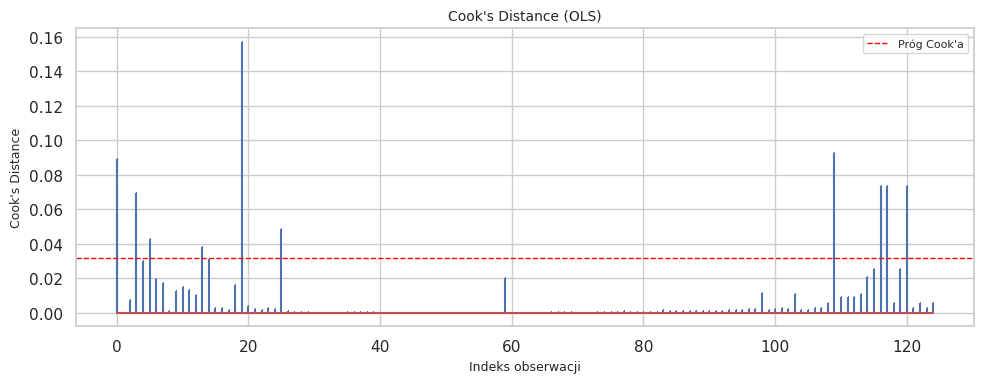

Wykres Cook's Distance umożliwia identyfikację obserwacji, które mogą zniekształcać wyniki modelu.
Tabela testu normalności reszt (Shapiro-Wilka):


,Statystyka,p-value
Shapiro-Wilk,0.83,0.00


Interpretacja: p-value < 0.05 wskazuje, że reszty nie są normalnie rozłożone.

Statystyka Durbin-Watsona: 1.4569
Interpretacja: Wartość bliska 2 wskazuje na brak autokorelacji; wartości poniżej 2 sugerują dodatnią autokorelację, powyżej 2 – ujemną.

Tabela testu specyfikacji modelu (Ramsey RESET):


,F-statystyka,p-value,df_num,df_denom
0,0.03,0.85,1.00,122.00


Interpretacja: Jeśli p-value < 0.05, model może być źle specyfikowany (np. brak nieliniowych składników).

Tabela wartości dźwigni (leverage):


,Indeks,Leverage
0,0,0.02
1,1,0.01
2,2,0.01
3,3,0.01
4,4,0.04
5,5,0.01
6,6,0.04
7,7,0.01
8,8,0.03
9,9,0.03


Próg dźwigni wynosi: 0.0320
Interpretacja: Obserwacje z wartością dźwigni powyżej ustalonego progu mogą mieć nadmierny wpływ na estymację modelu.



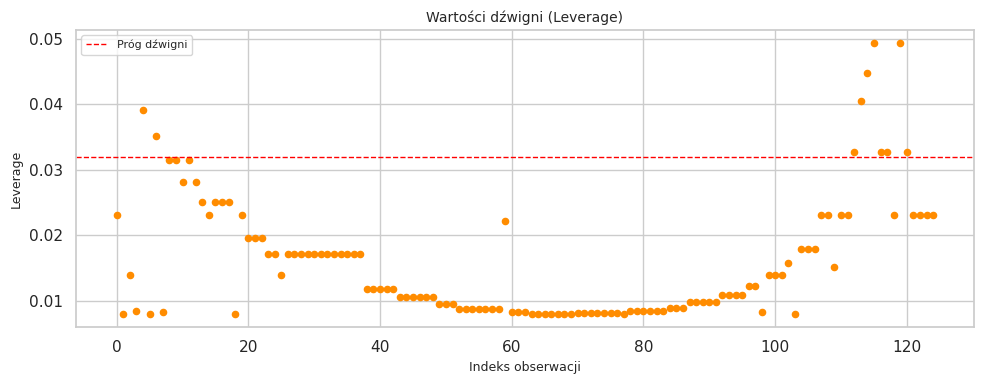

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau, shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.nonparametric.smoothers_lowess import lowess

# Dodatkowe testy:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset

# Import niezbędnych funkcji z sklearn do regresji wielomianowej
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Ustawienie profesjonalnego stylu wykresów
sns.set_style("whitegrid")

def analyze_numerical_relationship_full(df, x_col, y_col, plot=True):
   
    def display_side_by_side(*dfs, margin='50px', titles=None):
        html_str = ""
        for i, df in enumerate(dfs):
            title_html = ""
            if titles is not None and i < len(titles):
                title_html = f'<h4 style="text-align:center; margin-bottom:5px;">{titles[i]}</h4>'
            html_str += (
                f'<div style="display: inline-block; margin-right: {margin}; vertical-align: top;">'
                f'{title_html}'
                f'{df.to_html(classes="dataframe", border=1)}'
                f'</div>'
            )
        display_html(html_str, raw=True)

    # 1. Przygotowanie danych: usunięcie obserwacji z brakami
    df_clean = df[[x_col, y_col]].dropna()


    # 1a. Statystyki opisowe
    stats_x = df_clean[x_col].describe()
    stats_y = df_clean[y_col].describe()
    stats_table = pd.concat([stats_x, stats_y], axis=1)
    stats_table.columns = [x_col, y_col]
    print()

  
    # 2. Analiza korelacji
    pearson_corr, pearson_p = pearsonr(df_clean[x_col], df_clean[y_col])
    spearman_corr, spearman_p = spearmanr(df_clean[x_col], df_clean[y_col])
    kendall_corr, kendall_p = kendalltau(df_clean[x_col], df_clean[y_col])
    

    # Testowanie hipotezy o współczynniku korelacji
    alpha = 0.05
    pearson_significant = pearson_p < alpha
    spearman_significant = spearman_p < alpha
    kendall_significant = kendall_p < alpha

    hypothesis_test_table = pd.DataFrame({
        "Metoda": ["Pearson", "Spearman", "Kendall"],
        "Wartość": [pearson_corr, spearman_corr, kendall_corr],
        "p-value": [pearson_p, spearman_p, kendall_p],
        "Istotność (alpha=0.05)": [pearson_significant, spearman_significant, kendall_significant]
    })

    display_side_by_side(stats_table, hypothesis_test_table, titles=["Statystyki opisowe", "Współczynniki korelacji"])



    print()
    display(Markdown("Histogramy i wykresy density pozwalają ocenić centralną tendencję i rozproszenie danych."))
    
    # Wizualizacja rozkładu zmiennych: histogramy z density plot
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(8, 3))
        sns.histplot(df_clean[x_col], kde=True, ax=axes[0], color='steelblue', edgecolor='white')
        axes[0].set_title(f'Rozkład: {x_col}', fontsize=10)
        axes[0].set_xlabel(x_col, fontsize=9)
        axes[0].set_ylabel("Liczba obserwacji", fontsize=9)
        sns.histplot(df_clean[y_col], kde=True, ax=axes[1], color='indianred', edgecolor='white')
        axes[1].set_title(f'Rozkład: {y_col}', fontsize=10)
        axes[1].set_xlabel(y_col, fontsize=9)
        axes[1].set_ylabel("Liczba obserwacji", fontsize=9)
        plt.tight_layout()
        plt.show()
        
    
   
    
 
    print()
    display(Markdown("Interpretacja: Wartości bliskie 1 lub -1 oznaczają silną zależność, natomiast wartości bliskie 0 – słabą zależność"))
    # Heatmapa macierzy korelacji
    if plot:
        corr_matrix = df_clean[[x_col, y_col]].corr()
        plt.figure(figsize=(6, 3))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
        plt.title("Macierz korelacji", fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8, rotation=0)
        plt.tight_layout()
        plt.show()
        print("Heatmapa macierzy korelacji wizualnie przedstawia siłę i kierunek zależności między zmiennymi")
    
    # 3. Wizualizacja zależności: scatter plot z regresją liniową i wykresem lowess
    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(8, 3))
        sns.regplot(x=x_col, y=y_col, data=df_clean, ax=ax[0],
                    scatter_kws={'alpha': 0.6, 's': 20}, line_kws={'color': 'darkred', 'lw': 2})
        ax[0].set_title(f'Regresja liniowa: {x_col} vs {y_col}', fontsize=10)
        ax[0].set_xlabel(x_col, fontsize=9)
        ax[0].set_ylabel(y_col, fontsize=9)
        
        lowess_smoothed = lowess(df_clean[y_col], df_clean[x_col], frac=0.3)
        ax[1].scatter(df_clean[x_col], df_clean[y_col], alpha=0.6, s=20, color='gray')
        ax[1].plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='navy', lw=2)
        ax[1].set_title(f'Lowess smoothing: {x_col} vs {y_col}', fontsize=10)
        ax[1].set_xlabel(x_col, fontsize=9)
        ax[1].set_ylabel(y_col, fontsize=9)
        plt.tight_layout()
        plt.show()
        print("Scatter plot z linią regresji i wykres lowess pomagają wizualnie ocenić trend zależności między zmiennymi.\n")
    
    # 4. Model regresji liniowej (OLS)
    X = sm.add_constant(df_clean[x_col])
    y = df_clean[y_col]
    ols_model = sm.OLS(y, X).fit()
    
    print("Dopasowano model regresji liniowej (OLS).")
    coef_table = ols_model.summary2().tables[1]
    print("Tabela współczynników modelu OLS:")
    display(coef_table)
    display(Markdown("Interpretacja: Tabela zawiera estymowane współczynniki, statystyki t oraz p-value. Wysoka istotność (p < 0.05) wskazuje, że dany predyktor istotnie wpływa na zmienną zależną"))
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(8, 3))
        axes[0].scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.6, s=20, color='teal')
        axes[0].axhline(0, color='black', lw=1, ls='--')
        axes[0].set_xlabel('Wartości dopasowane', fontsize=9)
        axes[0].set_ylabel('Reszty', fontsize=9)
        axes[0].set_title('Reszty vs. Dopasowane (OLS)', fontsize=10)
        
        qqplot(ols_model.resid, line='s', ax=axes[1])
        axes[1].set_title('Q-Q plot reszt (OLS)', fontsize=10)
        plt.tight_layout()
        plt.show()
        print("Wykres diagnostyczny (reszty vs. dopasowane oraz Q-Q plot) pomaga ocenić, czy założenia modelu (np. normalność reszt) są spełnione.\n")
    
    # 5. Regresja wielomianowa (stopnia 2)
    poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    poly_model.fit(df_clean[[x_col]], df_clean[y_col])
    y_poly_pred = poly_model.predict(df_clean[[x_col]])
    
    if plot:
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.scatter(df_clean[x_col], df_clean[y_col], alpha=0.6, s=20, color='mediumseagreen', label='Dane')
        sorted_idx = np.argsort(df_clean[x_col])
        ax.plot(df_clean[x_col].iloc[sorted_idx], y_poly_pred[sorted_idx], color='purple', lw=2,
                label='Regresja wielomianowa (2 stopnia)')
        ax.set_xlabel(x_col, fontsize=9)
        ax.set_ylabel(y_col, fontsize=9)
        ax.set_title('Regresja wielomianowa', fontsize=10)
        ax.legend(fontsize=8)
        plt.tight_layout()
        plt.show()
        display(Markdown("Wykres regresji wielomianowej ilustruje potencjalną nieliniowość zależności między zmiennymi"))
    
    # 6. Regresja kwantylowa (dla mediany, q = 0.5)
    # Użycie funkcji Q() umożliwia poprawne wykorzystanie nazw kolumn zawierających spacje.
    quant_model = smf.quantreg(f"Q('{y_col}') ~ Q('{x_col}')", df_clean).fit(q=0.5)
    quant_table = quant_model.summary2().tables[1]
    print("Tabela współczynników modelu regresji kwantylowej (mediana):")
    display(quant_table)
    print(Markdown("Interpretacja: Regresja kwantylowa umożliwia analizę zależności dla różnych percentyli rozkładu, co daje pełniejszy obraz związku między zmiennymi"))
    
    # 7. Regresja robustyczna (RLM)
    rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
    rlm_table = rlm_model.summary2().tables[1]
    print("Tabela współczynników modelu regresji robustycznej (RLM):")
    display(rlm_table)
    print("Interpretacja: Model robustyczny jest mniej wrażliwy na wartości odstające, co pozwala na wiarygodną estymację parametrów nawet przy obecności anomalii.\n")
    
    # 8. Test heteroskedastyczności (Breusch-Pagana)
    bp_test = het_breuschpagan(ols_model.resid, X)
    bp_results = {
        "Lagrange multiplier statistic": bp_test[0],
        "p-value": bp_test[1],
        "f-value": bp_test[2],
        "f p-value": bp_test[3]
    }
    bp_table = pd.DataFrame(bp_results, index=["Wynik"]).T
    print("Tabela wyników testu heteroskedastyczności (Breusch-Pagana):")
    display(bp_table)
    print("Interpretacja: Jeśli p-value < 0.05, to wariancja reszt nie jest stała, co oznacza występowanie heteroskedastyczności.\n")
    
    # 9. Analiza wpływowych obserwacji – Cook's Distance
    influence = ols_model.get_influence()
    cooks_d = influence.cooks_distance[0]
    n_obs = len(df_clean)
    influential_points = np.where(cooks_d > 4 / n_obs)[0]
    cooks_table = pd.DataFrame({
        "Indeks": np.arange(n_obs),
        "Cook's Distance": cooks_d
    })
    print("Tabela Cook's Distance (wskaźnik wpływu obserwacji):")
    display(cooks_table.head(10))
    print("Interpretacja: Obserwacje z wartością Cook's Distance > 4/n mogą mieć nadmierny wpływ na model.\n")
    
    if plot:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.stem(np.arange(n_obs), cooks_d, markerfmt=",", use_line_collection=True)
        ax.axhline(4/n_obs, color='red', ls='--', lw=1, label="Próg Cook'a")
        ax.set_xlabel('Indeks obserwacji', fontsize=9)
        ax.set_ylabel("Cook's Distance", fontsize=9)
        ax.set_title("Cook's Distance (OLS)", fontsize=10)
        ax.legend(fontsize=8)
        plt.tight_layout()
        plt.show()
        print("Wykres Cook's Distance umożliwia identyfikację obserwacji, które mogą zniekształcać wyniki modelu.")
    
    # 10. Dodatkowe testy diagnostyczne:
    # 10a. Test normalności reszt (Shapiro-Wilka)
    shapiro_test = shapiro(ols_model.resid)
    shapiro_table = pd.DataFrame({
        "Statystyka": [shapiro_test.statistic],
        "p-value": [shapiro_test.pvalue]
    }, index=["Shapiro-Wilk"])
    print("Tabela testu normalności reszt (Shapiro-Wilka):")
    display(shapiro_table)
    print("Interpretacja: p-value < 0.05 wskazuje, że reszty nie są normalnie rozłożone.\n")
    
    # 10b. Test autokorelacji reszt (Durbin-Watsona)
    dw_stat = durbin_watson(ols_model.resid)
    print(f"Statystyka Durbin-Watsona: {dw_stat:.4f}")
    print("Interpretacja: Wartość bliska 2 wskazuje na brak autokorelacji; wartości poniżej 2 sugerują dodatnią autokorelację, powyżej 2 – ujemną.\n")
    
    # 10c. Test specyfikacji modelu (Ramsey RESET)
    reset_test = linear_reset(ols_model, power=2, test_type='fitted', use_f=True)
    reset_table = pd.DataFrame({
        "F-statystyka": [reset_test.fvalue],
        "p-value": [reset_test.pvalue],
        "df_num": [reset_test.df_num],
        "df_denom": [reset_test.df_denom]
    })
    print("Tabela testu specyfikacji modelu (Ramsey RESET):")
    display(reset_table)
    print("Interpretacja: Jeśli p-value < 0.05, model może być źle specyfikowany (np. brak nieliniowych składników).\n")
    
    # 10d. Obliczenie wartości dźwigni (leverage)
    leverage = influence.hat_matrix_diag
    leverage_table = pd.DataFrame({
        "Indeks": np.arange(n_obs),
        "Leverage": leverage
    })
    # Ustalamy próg dźwigni: np. 2*(p)/n, gdzie p=2 (stała + 1 predyktor)
    leverage_threshold = 2 * 2 / n_obs
    high_leverage = leverage_table[leverage_table["Leverage"] > leverage_threshold]
    print("Tabela wartości dźwigni (leverage):")
    display(leverage_table.head(10))
    print(f"Próg dźwigni wynosi: {leverage_threshold:.4f}")
    print("Interpretacja: Obserwacje z wartością dźwigni powyżej ustalonego progu mogą mieć nadmierny wpływ na estymację modelu.\n")
    
    if plot:
        # Wykres dźwigni
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.scatter(np.arange(n_obs), leverage, s=20, color='darkorange')
        ax.axhline(leverage_threshold, color='red', ls='--', lw=1, label="Próg dźwigni")
        ax.set_xlabel('Indeks obserwacji', fontsize=9)
        ax.set_ylabel("Leverage", fontsize=9)
        ax.set_title("Wartości dźwigni (Leverage)", fontsize=10)
        ax.legend(fontsize=8)
        plt.tight_layout()
        plt.show()
    
    # Zbiór wyników w słowniku
    results = {
        "descriptive_stats": stats_table,
        "ols_coefficients": coef_table,
        "quantile_regression": quant_table,
        "robust_regression": rlm_table,
        "breusch_pagan": bp_table,
        "cooks_distance": cooks_table,
        "influential_points": influential_points,
        "shapiro_test": shapiro_table,
        "durbin_watson": dw_stat,
        "reset_test": reset_table,
        "leverage": leverage_table,
        "high_leverage": high_leverage
    }
    
    return results

wyniki = analyze_numerical_relationship_full(baza, 'dochody mc', 'wydatki mc')


### 3.2. Analiza zależnosci zmiennych kategorycznych

**ANALIZA WPŁYWU ZMIENNEJ - [poziom dochodów]  NA ZMIENNĄ  - [towar]:**


Tabela kontyngencji oraz dodatkowe statystyki:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom dochodów,,,,,,,
bardzo wysoki,6,4,2,4,6,4,5
niski,2,4,3,10,6,4,6
wysoki,1,7,4,4,6,1,8
średni,2,5,10,0,5,3,3
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom dochodów,,,,,,,
bardzo wysoki,2.73,4.96,4.71,4.46,5.70,2.98,5.46
niski,3.08,5.60,5.32,5.04,6.44,3.36,6.16
wysoki,2.73,4.96,4.71,4.46,5.70,2.98,5.46



Tabele częstości:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom dochodów,,,,,,,
bardzo wysoki,4.80,3.20,1.60,3.20,4.80,3.20,4.00
niski,1.60,3.20,2.40,8.00,4.80,3.20,4.80
wysoki,0.80,5.60,3.20,3.20,4.80,0.80,6.40
średni,1.60,4.00,8.00,0.00,4.00,2.40,2.40
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom dochodów,,,,,,,
bardzo wysoki,54.55,20.00,10.53,22.22,26.09,33.33,22.73
niski,18.18,20.00,15.79,55.56,26.09,33.33,27.27
wysoki,9.09,35.00,21.05,22.22,26.09,8.33,36.36


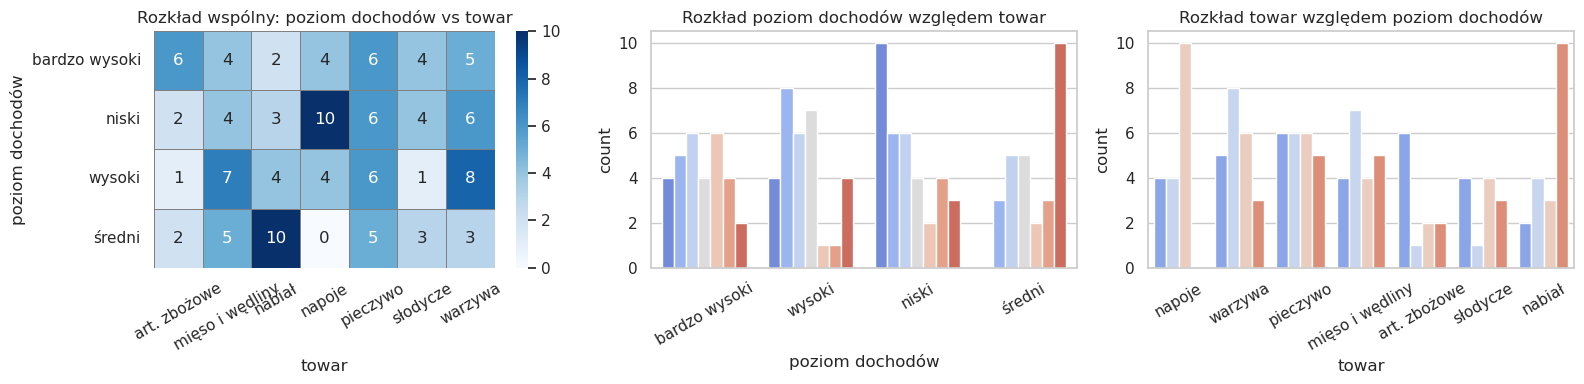

,Miara,Wartość,Interpretacja
0,Cramér's V,0.28,Słaby związek
1,Współczynnik kontyngencji,0.44,Umiarkowany związek
2,Tschuprow's T,0.24,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.20,Słaba przewidywalność
4,Siła testu,0.89,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.97,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom dochodów]  NA ZMIENNĄ  - [typ sklepu]:**


Tabela kontyngencji oraz dodatkowe statystyki:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom dochodów,,,,
bardzo wysoki,6,18,1,6
niski,13,5,13,4
wysoki,5,5,3,18
średni,5,0,13,10
typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom dochodów,,,,
bardzo wysoki,7.19,6.94,7.44,9.42
niski,8.12,7.84,8.40,10.64
wysoki,7.19,6.94,7.44,9.42



Tabele częstości:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom dochodów,,,,
bardzo wysoki,4.80,14.40,0.80,4.80
niski,10.40,4.00,10.40,3.20
wysoki,4.00,4.00,2.40,14.40
średni,4.00,0.00,10.40,8.00
typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom dochodów,,,,
bardzo wysoki,20.69,64.29,3.33,15.79
niski,44.83,17.86,43.33,10.53
wysoki,17.24,17.86,10.00,47.37


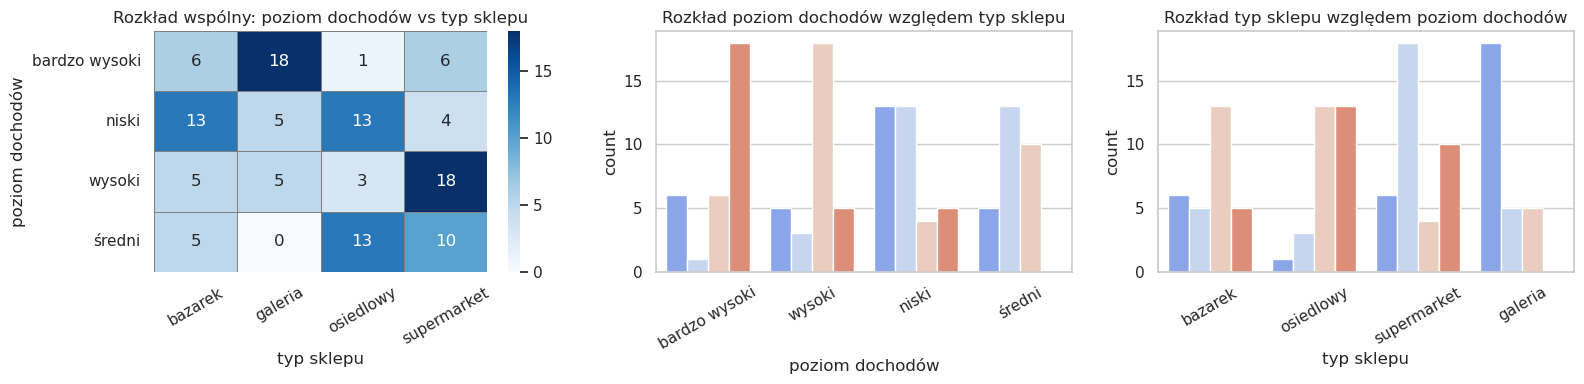

,Miara,Wartość,Interpretacja
0,Cramér's V,0.40,Umiarkowany związek
1,Współczynnik kontyngencji,0.57,Silny związek
2,Tschuprow's T,0.40,Umiarkowany związek
3,Współczynnik lambda Goodman-Kruskal,0.32,Umiarkowana przewidywalność
4,Siła testu,0.99,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,1.00,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom dochodów]  NA ZMIENNĄ  - [rodzaj promocji]:**


Tabela kontyngencji oraz dodatkowe statystyki:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom dochodów,,,,,,
bardzo wysoki,1,7,4,2,8,9
niski,1,17,2,7,3,5
wysoki,0,11,0,2,3,15
średni,1,10,4,3,5,5
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom dochodów,,,,,,
bardzo wysoki,0.74,11.16,2.48,3.47,4.71,8.43
niski,0.84,12.60,2.80,3.92,5.32,9.52
wysoki,0.74,11.16,2.48,3.47,4.71,8.43



Tabele częstości:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom dochodów,,,,,,
bardzo wysoki,0.80,5.60,3.20,1.60,6.40,7.20
niski,0.80,13.60,1.60,5.60,2.40,4.00
wysoki,0.00,8.80,0.00,1.60,2.40,12.00
średni,0.80,8.00,3.20,2.40,4.00,4.00
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom dochodów,,,,,,
bardzo wysoki,33.33,15.56,40.00,14.29,42.11,26.47
niski,33.33,37.78,20.00,50.00,15.79,14.71
wysoki,0.00,24.44,0.00,14.29,15.79,44.12


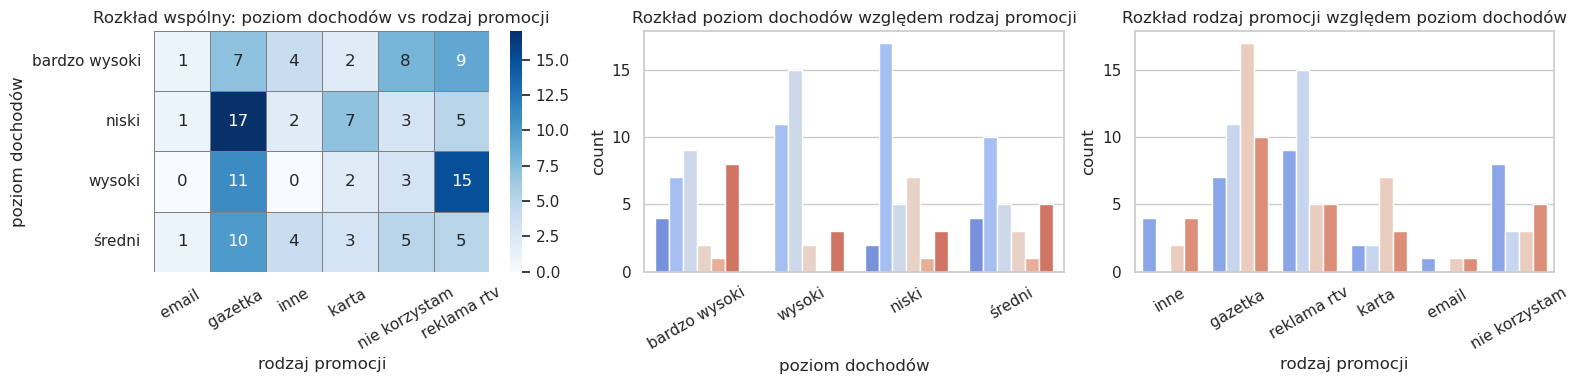

,Miara,Wartość,Interpretacja
0,Cramér's V,0.26,Słaby związek
1,Współczynnik kontyngencji,0.41,Umiarkowany związek
2,Tschuprow's T,0.23,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.17,Słaba przewidywalność
4,Siła testu,0.82,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.95,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom dochodów]  NA ZMIENNĄ  - [czynnik zakupowy]:**


Tabela kontyngencji oraz dodatkowe statystyki:


czynnik zakupowy,cena,inne,jakość,marka
poziom dochodów,,,,
bardzo wysoki,9,6,12,4
niski,11,4,13,7
wysoki,9,6,14,2
średni,9,3,8,8
czynnik zakupowy,cena,inne,jakość,marka
poziom dochodów,,,,
bardzo wysoki,9.42,4.71,11.66,5.21
niski,10.64,5.32,13.16,5.88
wysoki,9.42,4.71,11.66,5.21



Tabele częstości:


czynnik zakupowy,cena,inne,jakość,marka
poziom dochodów,,,,
bardzo wysoki,7.20,4.80,9.60,3.20
niski,8.80,3.20,10.40,5.60
wysoki,7.20,4.80,11.20,1.60
średni,7.20,2.40,6.40,6.40
czynnik zakupowy,cena,inne,jakość,marka
poziom dochodów,,,,
bardzo wysoki,23.68,31.58,25.53,19.05
niski,28.95,21.05,27.66,33.33
wysoki,23.68,31.58,29.79,9.52


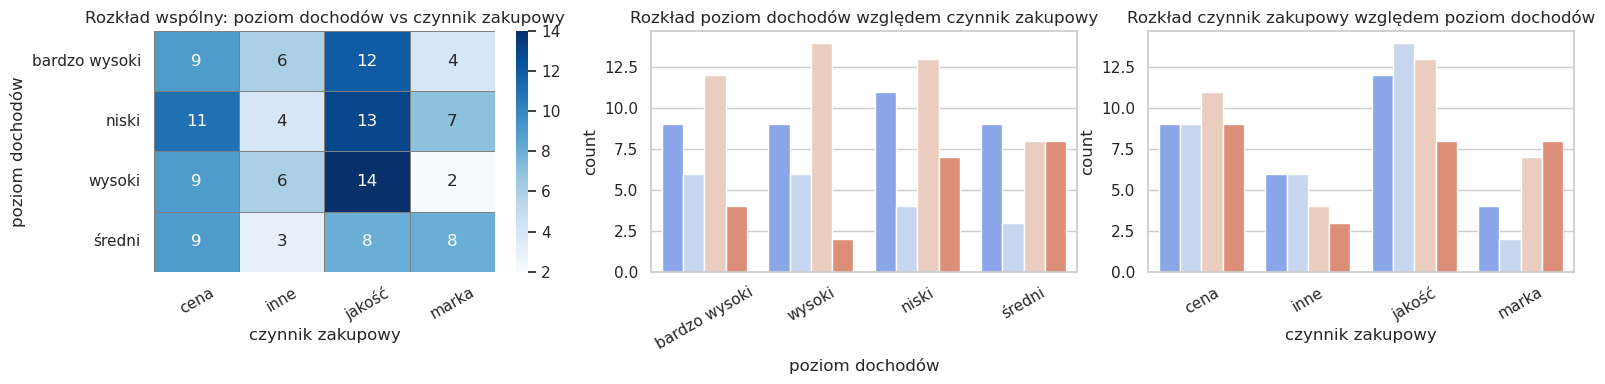

,Miara,Wartość,Interpretacja
0,Cramér's V,0.14,Słaby związek
1,Współczynnik kontyngencji,0.24,Słaby związek
2,Tschuprow's T,0.14,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.06,Bardzo słaba przewidywalność
4,Siła testu,0.35,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.40,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom wydatków]  NA ZMIENNĄ  - [towar]:**


Tabela kontyngencji oraz dodatkowe statystyki:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom wydatków,,,,,,,
bardzo wysoki,5,6,1,4,4,4,7
niski,2,3,2,7,6,4,8
wysoki,1,4,6,3,6,1,5
średni,3,7,10,4,7,3,2
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom wydatków,,,,,,,
bardzo wysoki,2.73,4.96,4.71,4.46,5.70,2.98,5.46
niski,2.82,5.12,4.86,4.61,5.89,3.07,5.63
wysoki,2.29,4.16,3.95,3.74,4.78,2.50,4.58



Tabele częstości:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom wydatków,,,,,,,
bardzo wysoki,4.00,4.80,0.80,3.20,3.20,3.20,5.60
niski,1.60,2.40,1.60,5.60,4.80,3.20,6.40
wysoki,0.80,3.20,4.80,2.40,4.80,0.80,4.00
średni,2.40,5.60,8.00,3.20,5.60,2.40,1.60
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
poziom wydatków,,,,,,,
bardzo wysoki,45.45,30.00,5.26,22.22,17.39,33.33,31.82
niski,18.18,15.00,10.53,38.89,26.09,33.33,36.36
wysoki,9.09,20.00,31.58,16.67,26.09,8.33,22.73


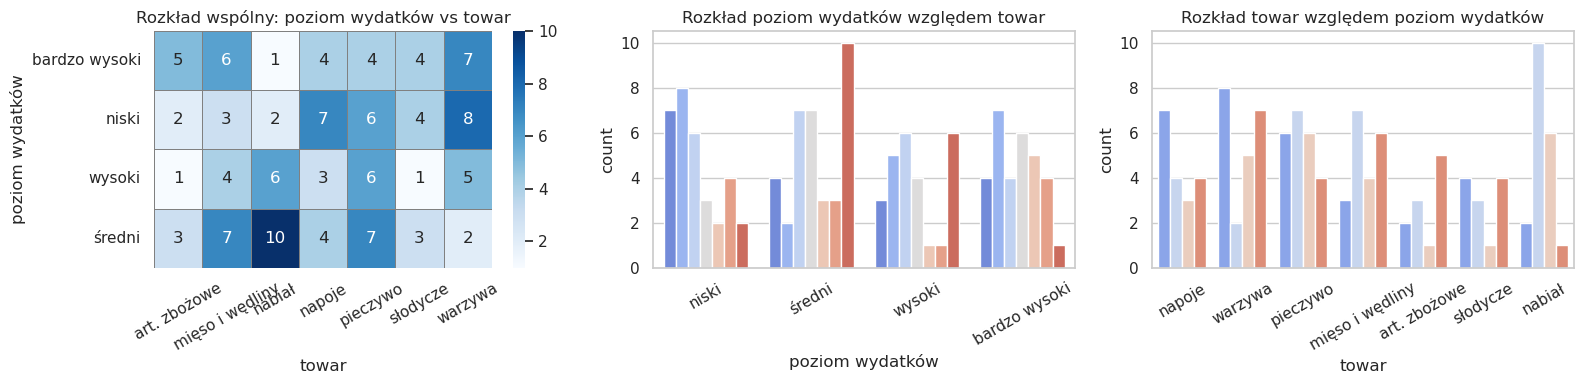

,Miara,Wartość,Interpretacja
0,Cramér's V,0.24,Słaby związek
1,Współczynnik kontyngencji,0.39,Umiarkowany związek
2,Tschuprow's T,0.20,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.15,Słaba przewidywalność
4,Siła testu,0.78,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.78,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom wydatków]  NA ZMIENNĄ  - [typ sklepu]:**


Tabela kontyngencji oraz dodatkowe statystyki:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom wydatków,,,,
bardzo wysoki,1,21,3,6
niski,17,3,8,4
wysoki,3,1,3,19
średni,8,3,16,9
typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom wydatków,,,,
bardzo wysoki,7.19,6.94,7.44,9.42
niski,7.42,7.17,7.68,9.73
wysoki,6.03,5.82,6.24,7.90



Tabele częstości:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom wydatków,,,,
bardzo wysoki,0.80,16.80,2.40,4.80
niski,13.60,2.40,6.40,3.20
wysoki,2.40,0.80,2.40,15.20
średni,6.40,2.40,12.80,7.20
typ sklepu,bazarek,galeria,osiedlowy,supermarket
poziom wydatków,,,,
bardzo wysoki,3.45,75.00,10.00,15.79
niski,58.62,10.71,26.67,10.53
wysoki,10.34,3.57,10.00,50.00


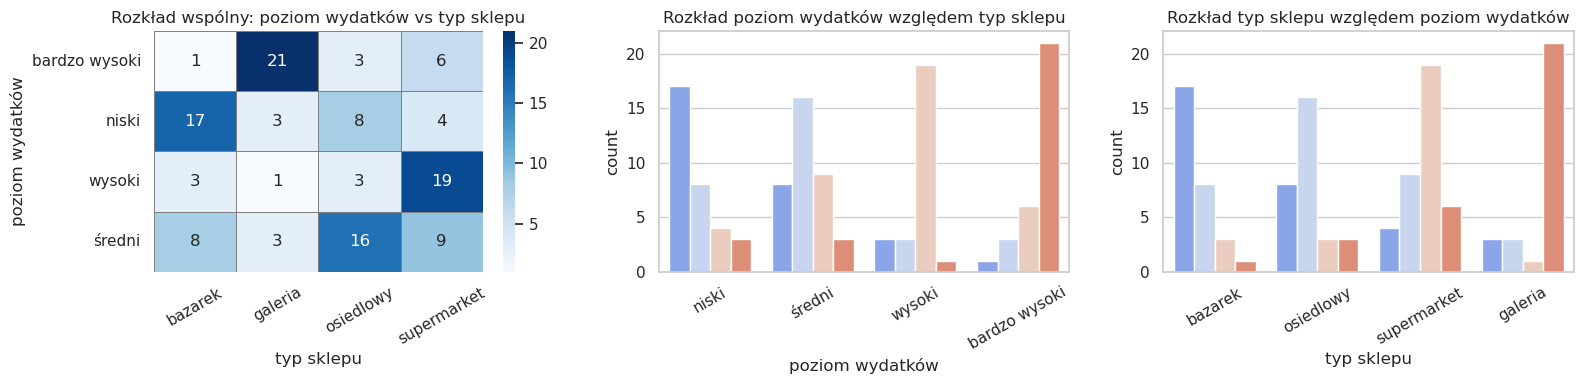

,Miara,Wartość,Interpretacja
0,Cramér's V,0.49,Umiarkowany związek
1,Współczynnik kontyngencji,0.64,Silny związek
2,Tschuprow's T,0.49,Umiarkowany związek
3,Współczynnik lambda Goodman-Kruskal,0.41,Umiarkowana przewidywalność
4,Siła testu,1.00,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,1.00,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom wydatków]  NA ZMIENNĄ  - [rodzaj promocji]:**


Tabela kontyngencji oraz dodatkowe statystyki:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom wydatków,,,,,,
bardzo wysoki,0,10,2,2,6,11
niski,2,14,3,7,2,4
wysoki,0,8,0,2,5,11
średni,1,13,5,3,6,8
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom wydatków,,,,,,
bardzo wysoki,0.74,11.16,2.48,3.47,4.71,8.43
niski,0.77,11.52,2.56,3.58,4.86,8.70
wysoki,0.62,9.36,2.08,2.91,3.95,7.07



Tabele częstości:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom wydatków,,,,,,
bardzo wysoki,0.00,8.00,1.60,1.60,4.80,8.80
niski,1.60,11.20,2.40,5.60,1.60,3.20
wysoki,0.00,6.40,0.00,1.60,4.00,8.80
średni,0.80,10.40,4.00,2.40,4.80,6.40
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
poziom wydatków,,,,,,
bardzo wysoki,0.00,22.22,20.00,14.29,31.58,32.35
niski,66.67,31.11,30.00,50.00,10.53,11.76
wysoki,0.00,17.78,0.00,14.29,26.32,32.35


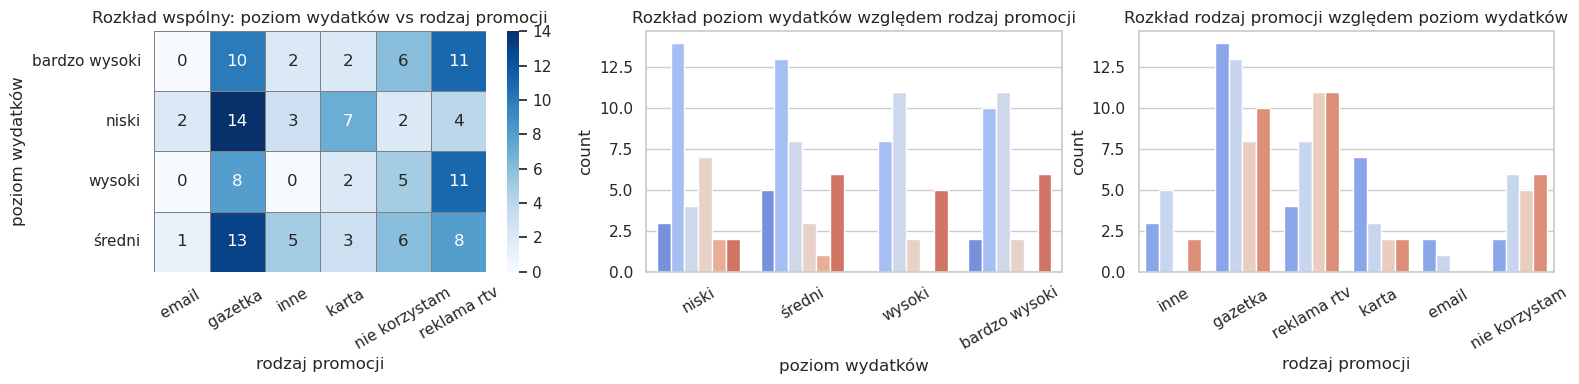

,Miara,Wartość,Interpretacja
0,Cramér's V,0.23,Słaby związek
1,Współczynnik kontyngencji,0.38,Umiarkowany związek
2,Tschuprow's T,0.21,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.14,Słaba przewidywalność
4,Siła testu,0.75,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.85,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [poziom wydatków]  NA ZMIENNĄ  - [czynnik zakupowy]:**


Tabela kontyngencji oraz dodatkowe statystyki:


czynnik zakupowy,cena,inne,jakość,marka
poziom wydatków,,,,
bardzo wysoki,10,5,12,4
niski,10,4,13,5
wysoki,7,5,10,4
średni,11,5,12,8
czynnik zakupowy,cena,inne,jakość,marka
poziom wydatków,,,,
bardzo wysoki,9.42,4.71,11.66,5.21
niski,9.73,4.86,12.03,5.38
wysoki,7.90,3.95,9.78,4.37



Tabele częstości:


czynnik zakupowy,cena,inne,jakość,marka
poziom wydatków,,,,
bardzo wysoki,8.00,4.00,9.60,3.20
niski,8.00,3.20,10.40,4.00
wysoki,5.60,4.00,8.00,3.20
średni,8.80,4.00,9.60,6.40
czynnik zakupowy,cena,inne,jakość,marka
poziom wydatków,,,,
bardzo wysoki,26.32,26.32,25.53,19.05
niski,26.32,21.05,27.66,23.81
wysoki,18.42,26.32,21.28,19.05


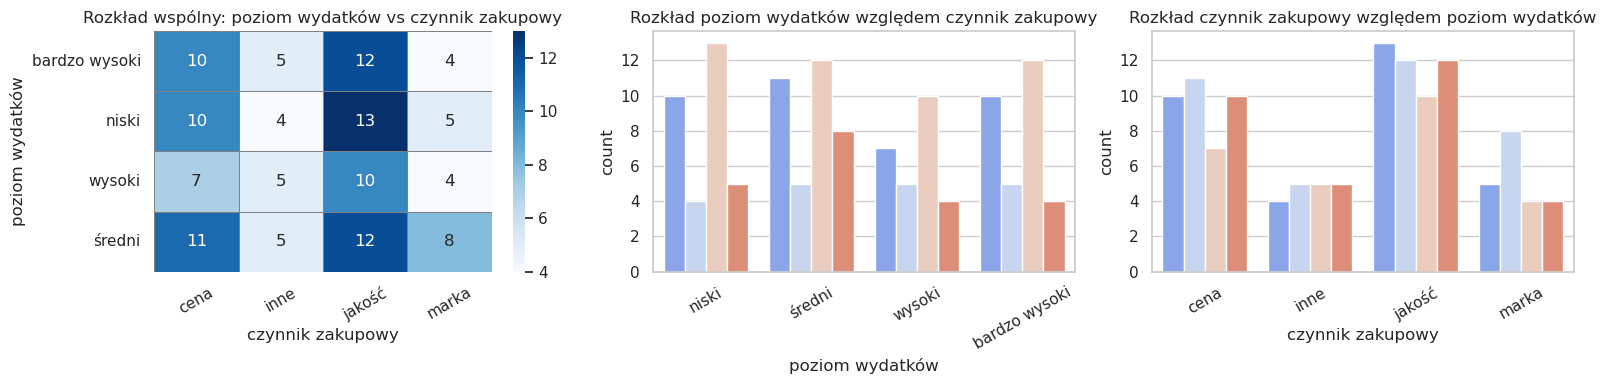

,Miara,Wartość,Interpretacja
0,Cramér's V,0.07,Brak związku (bardzo słaba zależność)
1,Współczynnik kontyngencji,0.12,Słaby związek
2,Tschuprow's T,0.07,Brak związku (bardzo słaba zależność)
3,Współczynnik lambda Goodman-Kruskal,0.01,Bardzo słaba przewidywalność
4,Siła testu,0.12,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.01,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wiek]  NA ZMIENNĄ  - [towar]:**


Tabela kontyngencji oraz dodatkowe statystyki:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wiek,,,,,,,
14-22,1,2,0,1,3,3,2
23-39,5,5,6,5,2,2,9
40-65,3,11,9,5,10,6,8
> 66,2,2,4,7,8,1,3
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wiek,,,,,,,
14-22,1.06,1.92,1.82,1.73,2.21,1.15,2.11
23-39,2.99,5.44,5.17,4.90,6.26,3.26,5.98
40-65,4.58,8.32,7.90,7.49,9.57,4.99,9.15



Tabele częstości:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wiek,,,,,,,
14-22,0.80,1.60,0.00,0.80,2.40,2.40,1.60
23-39,4.00,4.00,4.80,4.00,1.60,1.60,7.20
40-65,2.40,8.80,7.20,4.00,8.00,4.80,6.40
> 66,1.60,1.60,3.20,5.60,6.40,0.80,2.40
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wiek,,,,,,,
14-22,9.09,10.00,0.00,5.56,13.04,25.00,9.09
23-39,45.45,25.00,31.58,27.78,8.70,16.67,40.91
40-65,27.27,55.00,47.37,27.78,43.48,50.00,36.36


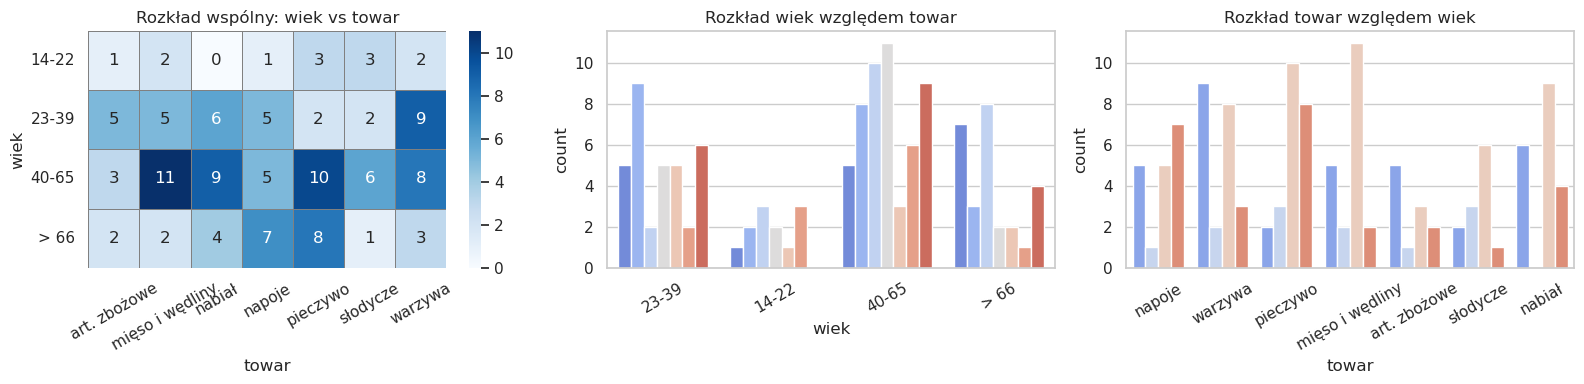

,Miara,Wartość,Interpretacja
0,Cramér's V,0.24,Słaby związek
1,Współczynnik kontyngencji,0.39,Umiarkowany związek
2,Tschuprow's T,0.20,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.15,Słaba przewidywalność
4,Siła testu,0.77,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.76,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wiek]  NA ZMIENNĄ  - [typ sklepu]:**


Tabela kontyngencji oraz dodatkowe statystyki:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
wiek,,,,
14-22,3,4,2,3
23-39,10,5,7,12
40-65,12,13,13,14
> 66,4,6,8,9
typ sklepu,bazarek,galeria,osiedlowy,supermarket
wiek,,,,
14-22,2.78,2.69,2.88,3.65
23-39,7.89,7.62,8.16,10.34
40-65,12.06,11.65,12.48,15.81



Tabele częstości:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
wiek,,,,
14-22,2.40,3.20,1.60,2.40
23-39,8.00,4.00,5.60,9.60
40-65,9.60,10.40,10.40,11.20
> 66,3.20,4.80,6.40,7.20
typ sklepu,bazarek,galeria,osiedlowy,supermarket
wiek,,,,
14-22,10.34,14.29,6.67,7.89
23-39,34.48,17.86,23.33,31.58
40-65,41.38,46.43,43.33,36.84


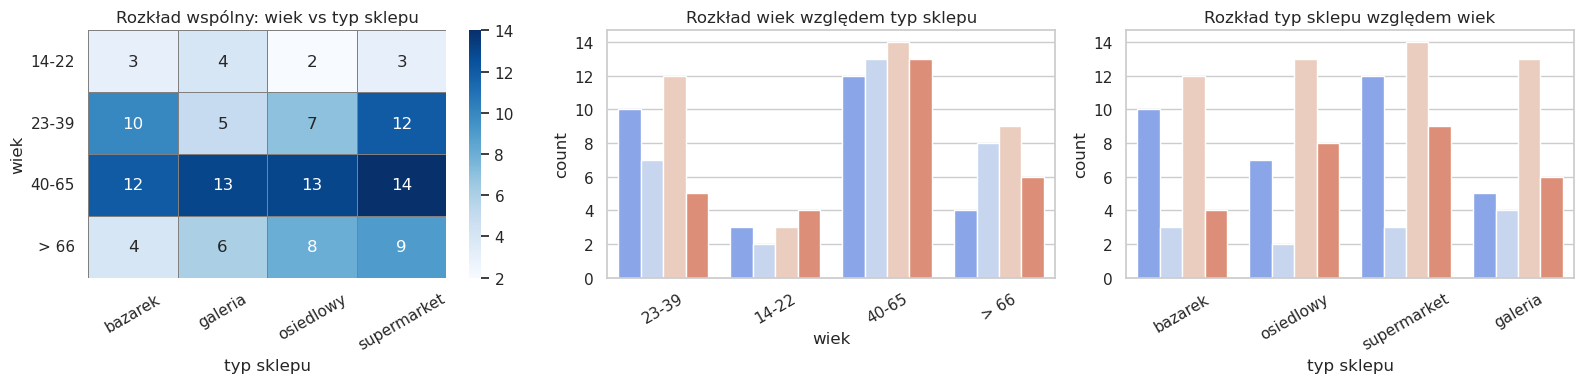

,Miara,Wartość,Interpretacja
0,Cramér's V,0.11,Słaby związek
1,Współczynnik kontyngencji,0.19,Słaby związek
2,Tschuprow's T,0.11,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.04,Bardzo słaba przewidywalność
4,Siła testu,0.24,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.13,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wiek]  NA ZMIENNĄ  - [rodzaj promocji]:**


Tabela kontyngencji oraz dodatkowe statystyki:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wiek,,,,,,
14-22,1,5,0,1,3,2
23-39,2,12,3,3,4,10
40-65,0,18,6,6,7,15
> 66,0,10,1,4,5,7
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wiek,,,,,,
14-22,0.29,4.32,0.96,1.34,1.82,3.26
23-39,0.82,12.24,2.72,3.81,5.17,9.25
40-65,1.25,18.72,4.16,5.82,7.90,14.14



Tabele częstości:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wiek,,,,,,
14-22,0.80,4.00,0.00,0.80,2.40,1.60
23-39,1.60,9.60,2.40,2.40,3.20,8.00
40-65,0.00,14.40,4.80,4.80,5.60,12.00
> 66,0.00,8.00,0.80,3.20,4.00,5.60
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wiek,,,,,,
14-22,33.33,11.11,0.00,7.14,15.79,5.88
23-39,66.67,26.67,30.00,21.43,21.05,29.41
40-65,0.00,40.00,60.00,42.86,36.84,44.12


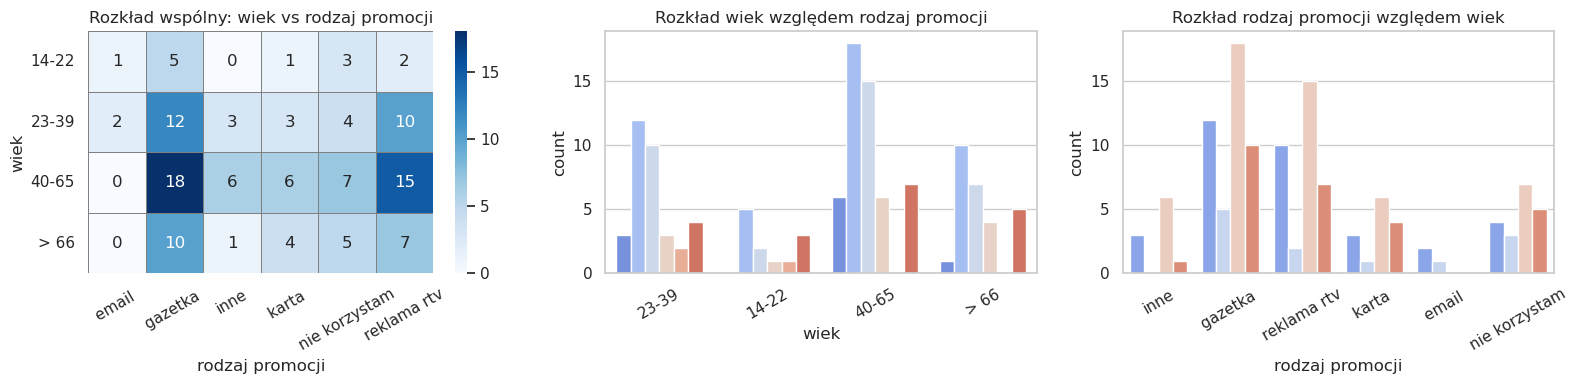

,Miara,Wartość,Interpretacja
0,Cramér's V,0.17,Słaby związek
1,Współczynnik kontyngencji,0.28,Słaby związek
2,Tschuprow's T,0.15,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.08,Bardzo słaba przewidywalność
4,Siła testu,0.46,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.21,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wiek]  NA ZMIENNĄ  - [czynnik zakupowy]:**


Tabela kontyngencji oraz dodatkowe statystyki:


czynnik zakupowy,cena,inne,jakość,marka
wiek,,,,
14-22,2,1,6,3
23-39,6,7,14,7
40-65,19,8,17,8
> 66,11,3,10,3
czynnik zakupowy,cena,inne,jakość,marka
wiek,,,,
14-22,3.65,1.82,4.51,2.02
23-39,10.34,5.17,12.78,5.71
40-65,15.81,7.90,19.55,8.74



Tabele częstości:


czynnik zakupowy,cena,inne,jakość,marka
wiek,,,,
14-22,1.60,0.80,4.80,2.40
23-39,4.80,5.60,11.20,5.60
40-65,15.20,6.40,13.60,6.40
> 66,8.80,2.40,8.00,2.40
czynnik zakupowy,cena,inne,jakość,marka
wiek,,,,
14-22,5.26,5.26,12.77,14.29
23-39,15.79,36.84,29.79,33.33
40-65,50.00,42.11,36.17,38.10


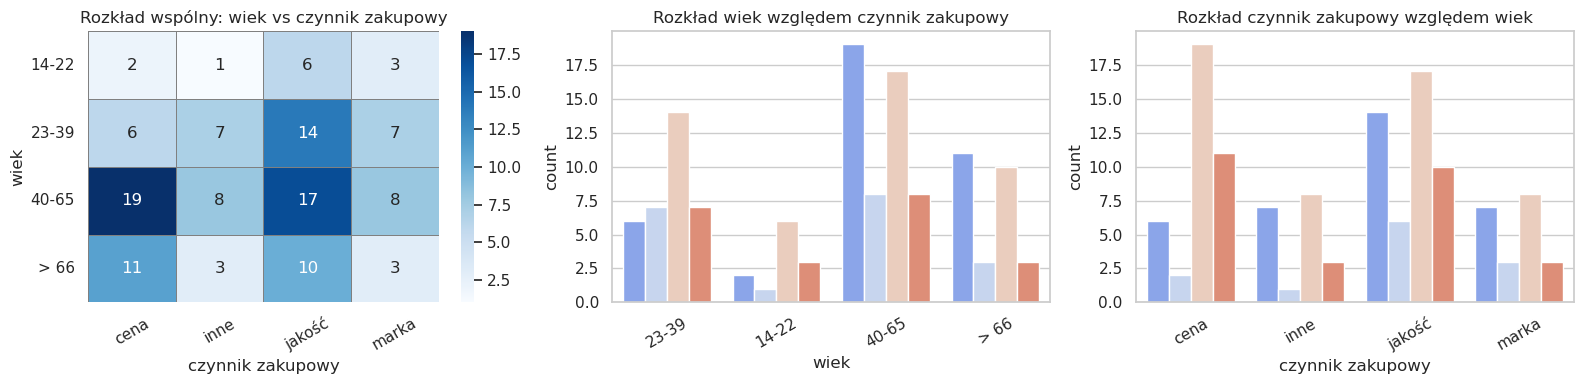

,Miara,Wartość,Interpretacja
0,Cramér's V,0.14,Słaby związek
1,Współczynnik kontyngencji,0.24,Słaby związek
2,Tschuprow's T,0.14,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.06,Bardzo słaba przewidywalność
4,Siła testu,0.36,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.44,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [płeć]  NA ZMIENNĄ  - [towar]:**


Tabela kontyngencji oraz dodatkowe statystyki:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
płeć,,,,,,,
k,9,17,16,9,13,8,13
m,2,3,3,9,10,4,9
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
płeć,,,,,,,
k,7.48,13.60,12.92,12.24,15.64,8.16,14.96
m,3.52,6.40,6.08,5.76,7.36,3.84,7.04



Tabele częstości:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
płeć,,,,,,,
k,7.20,13.60,12.80,7.20,10.40,6.40,10.40
m,1.60,2.40,2.40,7.20,8.00,3.20,7.20
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
płeć,,,,,,,
k,81.82,85.00,84.21,50.00,56.52,66.67,59.09
m,18.18,15.00,15.79,50.00,43.48,33.33,40.91
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
płeć,,,,,,,
k,10.59,20.00,18.82,10.59,15.29,9.41,15.29


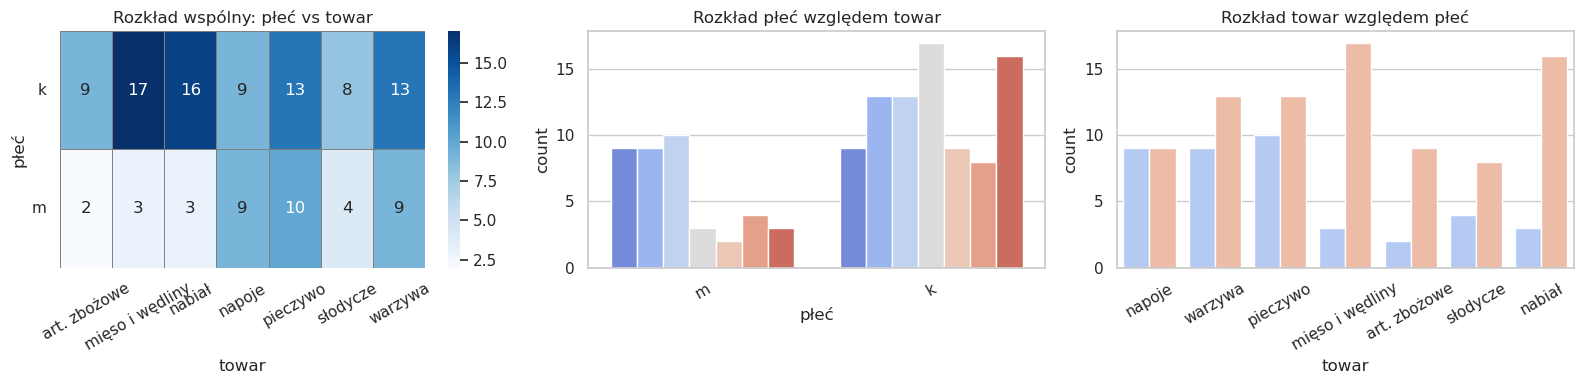

,Miara,Wartość,Interpretacja
0,Cramér's V,0.29,Słaby związek
1,Współczynnik kontyngencji,0.28,Słaby związek
2,Tschuprow's T,0.19,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.08,Bardzo słaba przewidywalność
4,Siła testu,0.91,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.91,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [płeć]  NA ZMIENNĄ  - [typ sklepu]:**


Tabela kontyngencji oraz dodatkowe statystyki:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
płeć,,,,
k,8,24,19,34
m,21,4,11,4
typ sklepu,bazarek,galeria,osiedlowy,supermarket
płeć,,,,
k,19.72,19.04,20.40,25.84
m,9.28,8.96,9.60,12.16



Tabele częstości:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
płeć,,,,
k,6.40,19.20,15.20,27.20
m,16.80,3.20,8.80,3.20
typ sklepu,bazarek,galeria,osiedlowy,supermarket
płeć,,,,
k,27.59,85.71,63.33,89.47
m,72.41,14.29,36.67,10.53
typ sklepu,bazarek,galeria,osiedlowy,supermarket
płeć,,,,
k,9.41,28.24,22.35,40.00


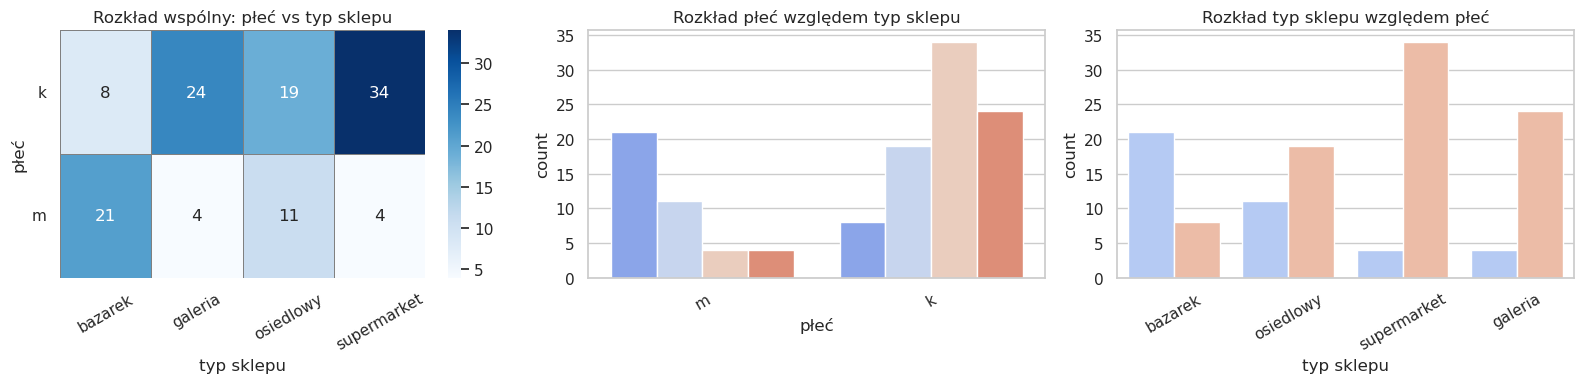

,Miara,Wartość,Interpretacja
0,Cramér's V,0.52,Silny związek
1,Współczynnik kontyngencji,0.46,Umiarkowany związek
2,Tschuprow's T,0.40,Umiarkowany związek
3,Współczynnik lambda Goodman-Kruskal,0.21,Słaba przewidywalność
4,Siła testu,1.00,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,1.00,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [płeć]  NA ZMIENNĄ  - [rodzaj promocji]:**


Tabela kontyngencji oraz dodatkowe statystyki:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
płeć,,,,,,
k,1,29,7,6,16,26
m,2,16,3,8,3,8
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
płeć,,,,,,
k,2.04,30.60,6.80,9.52,12.92,23.12
m,0.96,14.40,3.20,4.48,6.08,10.88



Tabele częstości:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
płeć,,,,,,
k,0.80,23.20,5.60,4.80,12.80,20.80
m,1.60,12.80,2.40,6.40,2.40,6.40
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
płeć,,,,,,
k,33.33,64.44,70.00,42.86,84.21,76.47
m,66.67,35.56,30.00,57.14,15.79,23.53
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
płeć,,,,,,
k,1.18,34.12,8.24,7.06,18.82,30.59


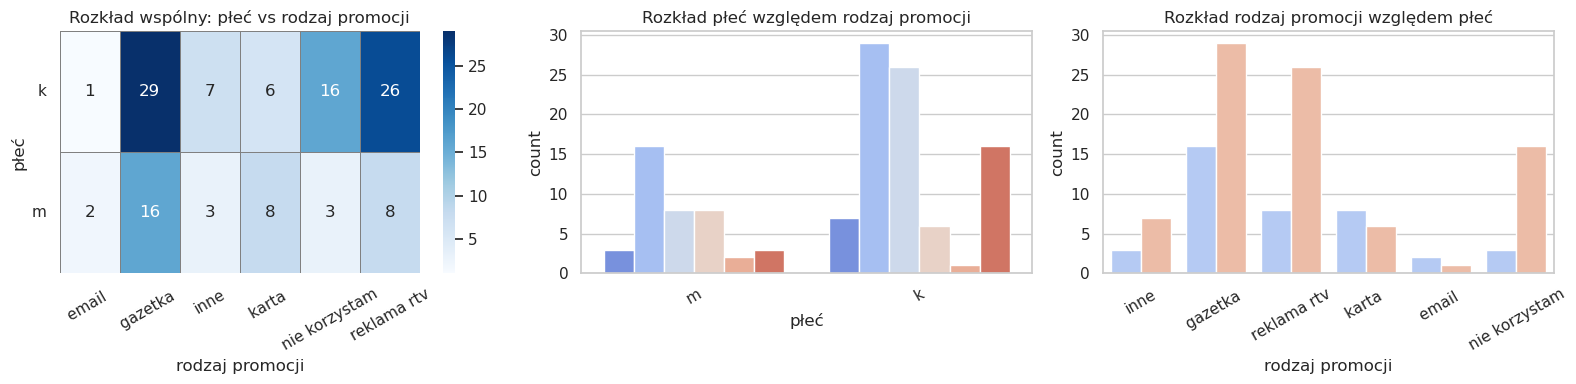

,Miara,Wartość,Interpretacja
0,Cramér's V,0.27,Słaby związek
1,Współczynnik kontyngencji,0.26,Słaby związek
2,Tschuprow's T,0.18,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.07,Bardzo słaba przewidywalność
4,Siła testu,0.87,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.91,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [płeć]  NA ZMIENNĄ  - [czynnik zakupowy]:**


Tabela kontyngencji oraz dodatkowe statystyki:


czynnik zakupowy,cena,inne,jakość,marka
płeć,,,,
k,26,13,32,14
m,12,6,15,7
czynnik zakupowy,cena,inne,jakość,marka
płeć,,,,
k,25.84,12.92,31.96,14.28
m,12.16,6.08,15.04,6.72



Tabele częstości:


czynnik zakupowy,cena,inne,jakość,marka
płeć,,,,
k,20.80,10.40,25.60,11.20
m,9.60,4.80,12.00,5.60
czynnik zakupowy,cena,inne,jakość,marka
płeć,,,,
k,68.42,68.42,68.09,66.67
m,31.58,31.58,31.91,33.33
czynnik zakupowy,cena,inne,jakość,marka
płeć,,,,
k,30.59,15.29,37.65,16.47


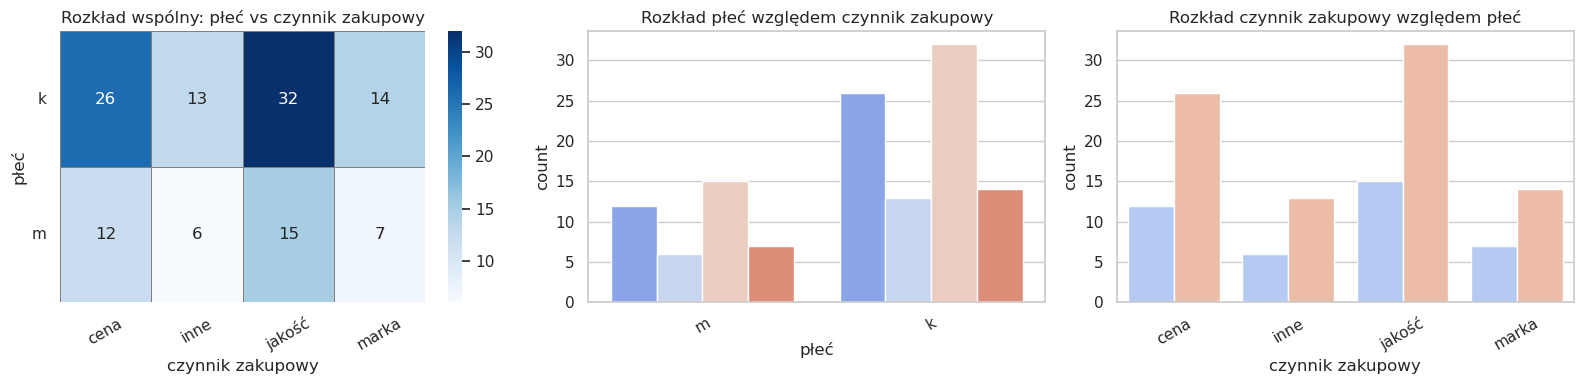

,Miara,Wartość,Interpretacja
0,Cramér's V,0.01,Brak związku (bardzo słaba zależność)
1,Współczynnik kontyngencji,0.01,Brak związku (bardzo słaba zależność)
2,Tschuprow's T,0.01,Brak związku (bardzo słaba zależność)
3,Współczynnik lambda Goodman-Kruskal,0.00,Bardzo słaba przewidywalność
4,Siła testu,0.05,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.00,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wykształcenie]  NA ZMIENNĄ  - [towar]:**


Tabela kontyngencji oraz dodatkowe statystyki:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wykształcenie,,,,,,,
podstawowe,0,1,0,3,4,1,1
wyższe,7,12,8,13,14,8,11
zawodowe,1,5,2,1,2,2,3
średnie,3,2,9,1,3,1,7
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wykształcenie,,,,,,,
podstawowe,0.88,1.60,1.52,1.44,1.84,0.96,1.76
wyższe,6.42,11.68,11.10,10.51,13.43,7.01,12.85
zawodowe,1.41,2.56,2.43,2.30,2.94,1.54,2.82



Tabele częstości:


towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wykształcenie,,,,,,,
podstawowe,0.00,0.80,0.00,2.40,3.20,0.80,0.80
wyższe,5.60,9.60,6.40,10.40,11.20,6.40,8.80
zawodowe,0.80,4.00,1.60,0.80,1.60,1.60,2.40
średnie,2.40,1.60,7.20,0.80,2.40,0.80,5.60
towar,art. zbożowe,mięso i wędliny,nabiał,napoje,pieczywo,słodycze,warzywa
wykształcenie,,,,,,,
podstawowe,0.00,5.00,0.00,16.67,17.39,8.33,4.55
wyższe,63.64,60.00,42.11,72.22,60.87,66.67,50.00
zawodowe,9.09,25.00,10.53,5.56,8.70,16.67,13.64


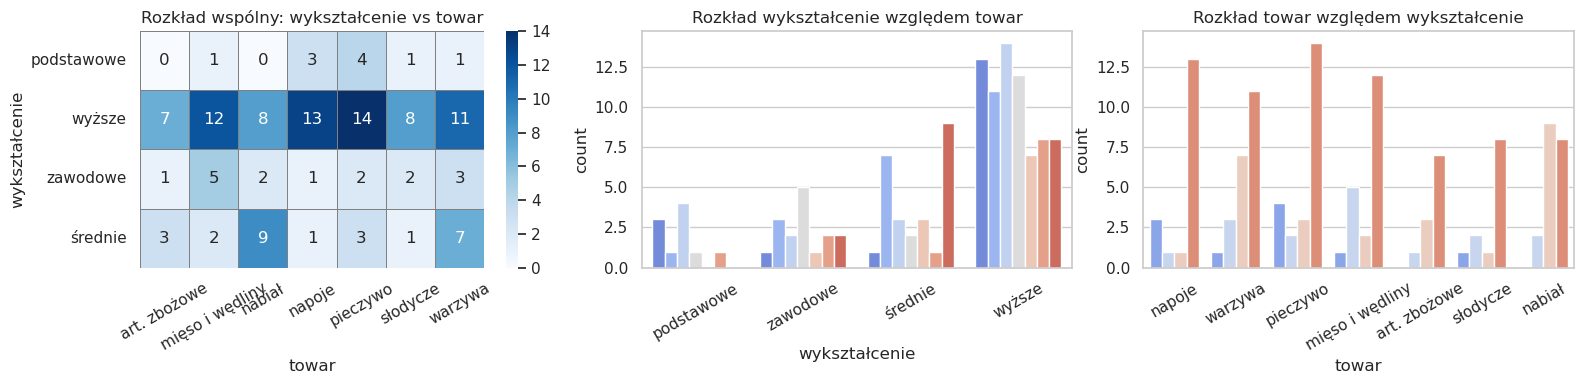

,Miara,Wartość,Interpretacja
0,Cramér's V,0.26,Słaby związek
1,Współczynnik kontyngencji,0.41,Umiarkowany związek
2,Tschuprow's T,0.22,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.17,Słaba przewidywalność
4,Siła testu,0.83,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.89,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wykształcenie]  NA ZMIENNĄ  - [typ sklepu]:**


Tabela kontyngencji oraz dodatkowe statystyki:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
wykształcenie,,,,
podstawowe,5,0,5,0
wyższe,9,28,9,27
zawodowe,8,0,8,0
średnie,7,0,8,11
typ sklepu,bazarek,galeria,osiedlowy,supermarket
wykształcenie,,,,
podstawowe,2.32,2.24,2.40,3.04
wyższe,16.94,16.35,17.52,22.19
zawodowe,3.71,3.58,3.84,4.86



Tabele częstości:


typ sklepu,bazarek,galeria,osiedlowy,supermarket
wykształcenie,,,,
podstawowe,4.00,0.00,4.00,0.00
wyższe,7.20,22.40,7.20,21.60
zawodowe,6.40,0.00,6.40,0.00
średnie,5.60,0.00,6.40,8.80
typ sklepu,bazarek,galeria,osiedlowy,supermarket
wykształcenie,,,,
podstawowe,17.24,0.00,16.67,0.00
wyższe,31.03,100.00,30.00,71.05
zawodowe,27.59,0.00,26.67,0.00


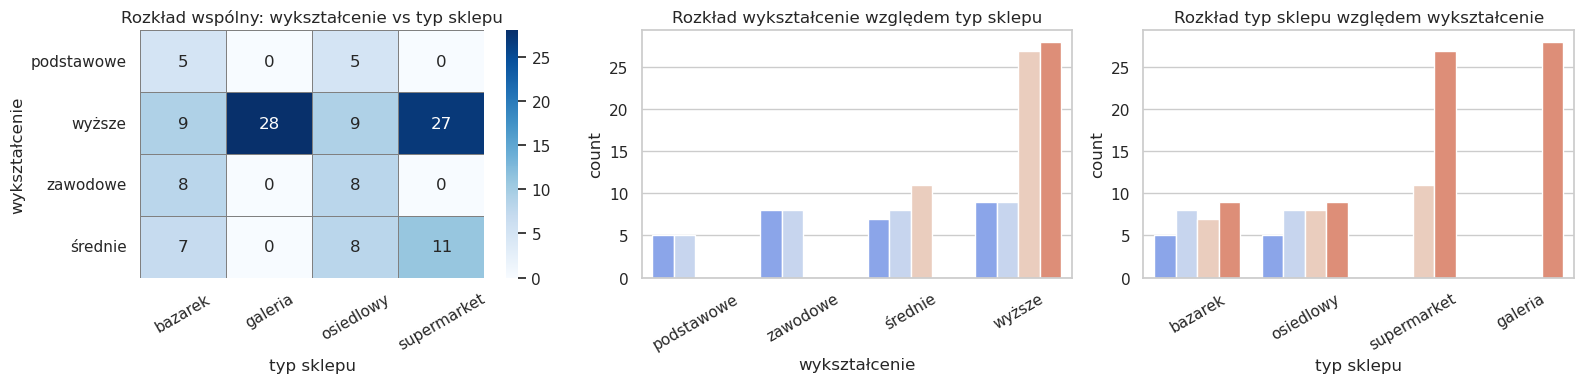

,Miara,Wartość,Interpretacja
0,Cramér's V,0.38,Umiarkowany związek
1,Współczynnik kontyngencji,0.55,Silny związek
2,Tschuprow's T,0.38,Umiarkowany związek
3,Współczynnik lambda Goodman-Kruskal,0.30,Umiarkowana przewidywalność
4,Siła testu,0.99,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,1.00,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wykształcenie]  NA ZMIENNĄ  - [rodzaj promocji]:**


Tabela kontyngencji oraz dodatkowe statystyki:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wykształcenie,,,,,,
podstawowe,1,5,2,0,0,2
wyższe,1,26,3,4,14,25
zawodowe,1,5,3,3,1,3
średnie,0,9,2,7,4,4
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wykształcenie,,,,,,
podstawowe,0.24,3.60,0.80,1.12,1.52,2.72
wyższe,1.75,26.28,5.84,8.18,11.10,19.86
zawodowe,0.38,5.76,1.28,1.79,2.43,4.35



Tabele częstości:


rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wykształcenie,,,,,,
podstawowe,0.80,4.00,1.60,0.00,0.00,1.60
wyższe,0.80,20.80,2.40,3.20,11.20,20.00
zawodowe,0.80,4.00,2.40,2.40,0.80,2.40
średnie,0.00,7.20,1.60,5.60,3.20,3.20
rodzaj promocji,email,gazetka,inne,karta,nie korzystam,reklama rtv
wykształcenie,,,,,,
podstawowe,33.33,11.11,20.00,0.00,0.00,5.88
wyższe,33.33,57.78,30.00,28.57,73.68,73.53
zawodowe,33.33,11.11,30.00,21.43,5.26,8.82


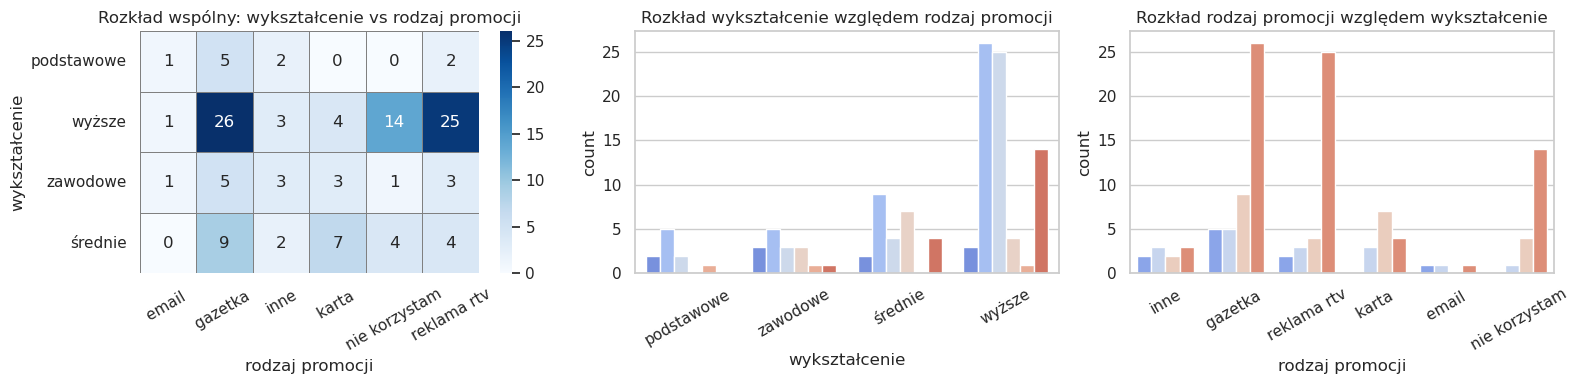

,Miara,Wartość,Interpretacja
0,Cramér's V,0.27,Słaby związek
1,Współczynnik kontyngencji,0.42,Umiarkowany związek
2,Tschuprow's T,0.23,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.18,Słaba przewidywalność
4,Siła testu,0.85,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.97,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest istotny statystycznie (p < 0.05).,


**ANALIZA WPŁYWU ZMIENNEJ - [wykształcenie]  NA ZMIENNĄ  - [czynnik zakupowy]:**


Tabela kontyngencji oraz dodatkowe statystyki:


czynnik zakupowy,cena,inne,jakość,marka
wykształcenie,,,,
podstawowe,2,3,4,1
wyższe,23,11,30,9
zawodowe,5,2,3,6
średnie,8,3,10,5
czynnik zakupowy,cena,inne,jakość,marka
wykształcenie,,,,
podstawowe,3.04,1.52,3.76,1.68
wyższe,22.19,11.10,27.45,12.26
zawodowe,4.86,2.43,6.02,2.69



Tabele częstości:


czynnik zakupowy,cena,inne,jakość,marka
wykształcenie,,,,
podstawowe,1.60,2.40,3.20,0.80
wyższe,18.40,8.80,24.00,7.20
zawodowe,4.00,1.60,2.40,4.80
średnie,6.40,2.40,8.00,4.00
czynnik zakupowy,cena,inne,jakość,marka
wykształcenie,,,,
podstawowe,5.26,15.79,8.51,4.76
wyższe,60.53,57.89,63.83,42.86
zawodowe,13.16,10.53,6.38,28.57


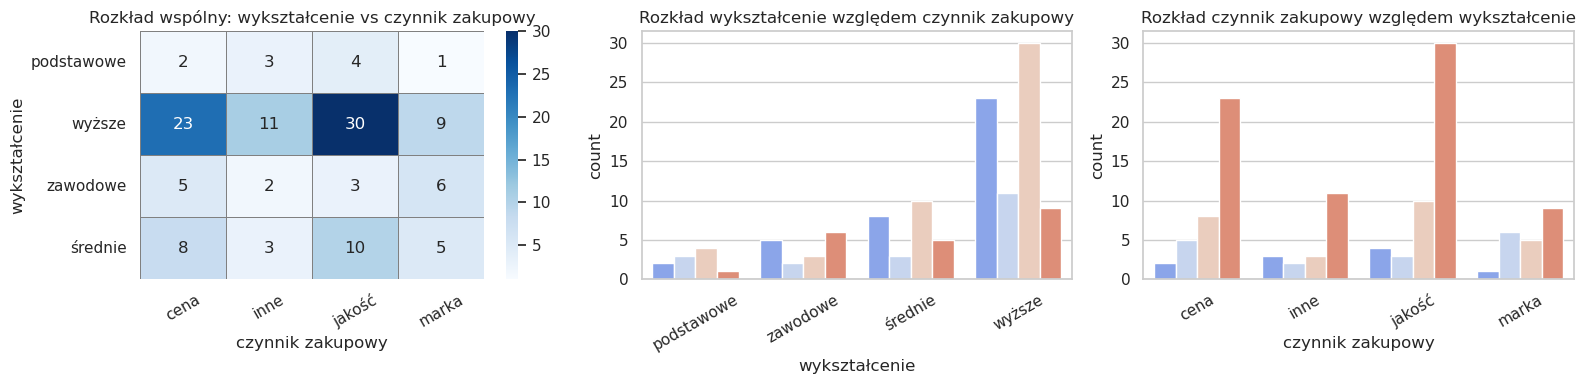

,Miara,Wartość,Interpretacja
0,Cramér's V,0.16,Słaby związek
1,Współczynnik kontyngencji,0.26,Słaby związek
2,Tschuprow's T,0.16,Słaby związek
3,Współczynnik lambda Goodman-Kruskal,0.07,Bardzo słaba przewidywalność
4,Siła testu,0.42,"Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
5,Moc testu,0.58,"Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny."
6,Interpretacja istotności statystycznej,Zależność między zmiennymi jest nieistotny statystycznie (p >= 0.05).,


In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display_html, display
from statsmodels.stats.power import GofChisquarePower
import prince  # Biblioteka do analizy korespondencji
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.power import GofChisquarePower

def display_side_by_side(*dfs, margin='50px', titles=None):
    html_str = ""
    for i, df in enumerate(dfs):
        title_html = ""
        if titles is not None and i < len(titles):
            title_html = f'<h4 style="text-align:center; margin-bottom:5px;">{titles[i]}</h4>'
        html_str += (
            f'<div style="display: inline-block; margin-right: {margin}; vertical-align: top;">'
            f'{title_html}'
            f'{df.to_html(classes="dataframe", border=1)}'
            f'</div>'
        )
    display_html(html_str, raw=True)



def analyze_nominal_variables(df, var1, var2):
  
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    
    total_percent = contingency_table / contingency_table.sum().sum() * 100
    col_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    row_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


    print("\nTabela kontyngencji oraz dodatkowe statystyki:")
    display_side_by_side(contingency_table, expected_df,
                         titles=["Tabela kontyngencji", "Tabela oczekiwanych częstotliwości"])
    print("\nTabele częstości:")
    display_side_by_side(total_percent, col_percent, row_percent, 
                         titles=["Częstości całkowite %", "Częstości wg kolumn %", "Częstości wg wierszy %"])
    print()

    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
    plt.title(f'Rozkład wspólny: {var1} vs {var2}')
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    
    plt.subplot(1, 3, 2)
    sns.countplot(data=df, x=var1, hue=var2, palette='coolwarm')
    plt.title(f'Rozkład {var1} względem {var2}')
    plt.xticks(rotation=30)
    plt.legend().remove()
    
    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x=var2, hue=var1, palette='coolwarm')
    plt.title(f'Rozkład {var2} względem {var1}')
    plt.xticks(rotation=30)
    plt.legend().remove()
    
    plt.tight_layout()
    plt.show()
    



    # Funkcje interpretacyjne

    def interpret_cramers_v(v):
        if v < 0.1:
            return 'Brak związku (bardzo słaba zależność)'
        elif v < 0.3:
            return 'Słaby związek'
        elif v < 0.5:
            return 'Umiarkowany związek'
        else:
            return 'Silny związek'

    def interpret_contingency_coefficient(cc):
        if cc < 0.1:
            return 'Brak związku (bardzo słaba zależność)'
        elif cc < 0.3:
            return 'Słaby związek'
        elif cc < 0.5:
            return 'Umiarkowany związek'
        else:
            return 'Silny związek'

    def interpret_tschuprows_t(tt):
        if tt is None:
            return 'Nie można obliczyć'
        elif tt < 0.1:
            return 'Brak związku (bardzo słaba zależność)'
        elif tt < 0.3:
            return 'Słaby związek'
        elif tt < 0.5:
            return 'Umiarkowany związek'
        else:
            return 'Silny związek'

    def interpret_lambda(lambda_val):
        if lambda_val < 0.1:
            return 'Bardzo słaba przewidywalność'
        elif lambda_val < 0.3:
            return 'Słaba przewidywalność'
        elif lambda_val < 0.5:
            return 'Umiarkowana przewidywalność'
        else:
            return 'Silna przewidywalność'

    # Test chi-kwadrat
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.values.sum()

    # Obliczenie miar
    cramers_v = round((chi2 / (n * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1))) ** 0.5, 4)
    contingency_coefficient = round((chi2 / (chi2 + n)) ** 0.5, 4)
    r, c = contingency_table.shape
    tschuprows_t = round((chi2 / (n * ((r - 1) * (c - 1)) ** 0.5)) ** 0.5, 4) if (r > 1 and c > 1) else None

    # Współczynnik lambda Goodman-Kruskal
    lambda_val = round((chi2 / (chi2 + n)) if chi2 + n != 0 else 0, 4)

    # Moc testu
    alpha = 0.05
    effect_size = cramers_v
    power_analysis = GofChisquarePower()
    sample_size = contingency_table.sum().sum()
    power_result = round(power_analysis.solve_power(effect_size=effect_size, nobs=sample_size, alpha=alpha), 4)

    # Interpretacja istotności statystycznej
    significance = 'istotny statystycznie (p < 0.05)' if p < 0.05 else 'nieistotny statystycznie (p >= 0.05)'
    interpretation_statistical_significance = f"Zależność między zmiennymi jest {significance}."

    # Tworzenie tabeli wyników
    results_table = pd.DataFrame({
        "Miara": [
            "Cramér's V",
            "Współczynnik kontyngencji",
            "Tschuprow's T",
            "Współczynnik lambda Goodman-Kruskal",
            "Siła testu",
            "Moc testu",
            "Interpretacja istotności statystycznej"
        ],
        "Wartość": [
            cramers_v,
            contingency_coefficient,
            tschuprows_t,
            lambda_val,
            power_result,
            round(1 - p, 4),
            interpretation_statistical_significance
        ],
        "Interpretacja": [
            interpret_cramers_v(cramers_v),
            interpret_contingency_coefficient(contingency_coefficient),
            interpret_tschuprows_t(tschuprows_t),
            interpret_lambda(lambda_val),
            "Siła testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny.",
            "Moc testu powinna być większa niż 0.8, aby uznać test za wystarczająco mocny.",
            ""
        ]
    })

    # Wyświetlenie wyników
    display(results_table)





    # # Analiza korespondencji
    # ca = prince.CA(n_components=2)
    # ca.fit(contingency_table)
    # row_coords = ca.row_coordinates(contingency_table)
    # col_coords = ca.column_coordinates(contingency_table)
    
    # plt.figure(figsize=(8, 6))
    # plt.scatter(row_coords[0], row_coords[1], label='Wiersze', c='blue', alpha=0.7, edgecolors='k')
    # plt.scatter(col_coords[0], col_coords[1], label='Kolumny', c='red', alpha=0.7, edgecolors='k')
    
    # for i, txt in enumerate(row_coords.index):
    #     plt.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), color='blue', fontsize=10)
    # for i, txt in enumerate(col_coords.index):
    #     plt.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), color='red', fontsize=10)
    
    # plt.axhline(0, linestyle='--', color='grey', alpha=0.5)
    # plt.axvline(0, linestyle='--', color='grey', alpha=0.5)
    # plt.title("Analiza korespondencji - Wizualizacja zależności")
    # plt.xlabel("Wymiar 1")
    # plt.ylabel("Wymiar 2")
    # plt.legend()
    # plt.grid(True, linestyle='--', alpha=0.6)
    # plt.show()



    
    # print("\nInterpretacja analizy korespondencji:")
    # print("Wykres analizy korespondencji pozwala na wizualizację zależności między kategoriami zmiennych.")
    # print("Bliskość punktów oznacza silniejszą zależność między kategoriami, a kierunek wskazuje wspólne wzorce w danych.")




zmienna1 = ['poziom dochodów', 'poziom wydatków','wiek', 'płeć','wykształcenie']
zmienna2 = ['towar', 'typ sklepu', 'rodzaj promocji', 'czynnik zakupowy']



for var1 in zmienna1:
    for var2 in zmienna2:
        display(Markdown(f"**ANALIZA WPŁYWU ZMIENNEJ - [{var1}]  NA ZMIENNĄ  - [{var2}]:**"))
        analyze_nominal_variables(baza, var1, var2)



### 3.3. Analiza zmiennych numerycznych wg  poziomów zmiennych kategorycznych

ANALIZA DLA TYP SKLEPU


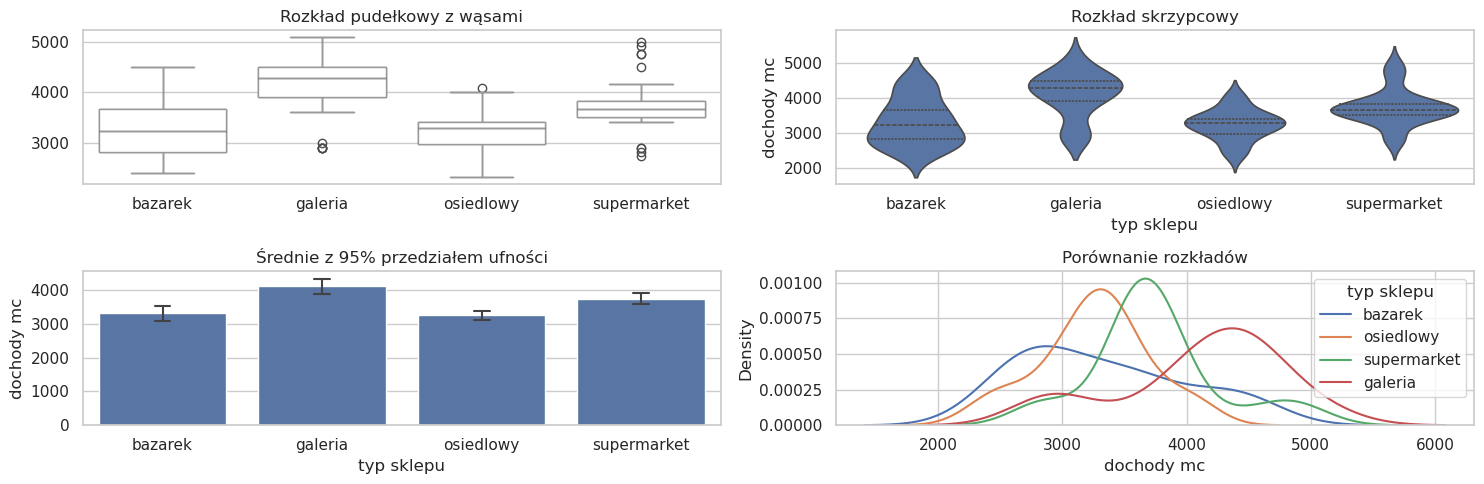

DESCRIPTIVESTATS


,count,mean,std,min,25%,50%,75%,max
typ sklepu,,,,,,,,
bazarek,29.00,3326.72,658.58,2417.00,2833.00,3250.00,3667.00,4500.00
galeria,28.00,4111.14,647.75,2917.00,3917.00,4291.50,4500.00,5083.00
osiedlowy,30.00,3252.83,433.52,2333.00,2979.50,3291.50,3417.00,4083.00
supermarket,38.00,3742.74,510.65,2750.00,3520.75,3667.00,3833.00,5000.00
overall,125.00,3611.17,650.23,2333.00,3167.00,3583.00,4000.00,5083.00



Interpretacja: Podstawowe miary tendencji centralnej i rozproszenia dla grup.
NORMALITY


,category,shapiro_p,ks_p,interpretation,H0,HA
0,bazarek,0.02,0.26,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
1,galeria,0.00,0.37,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
2,osiedlowy,0.31,0.43,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
3,supermarket,0.00,0.06,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego


VARIANCE


,test,statistic,p_value,interpretation,H0,HA
0,Levene,2.55,0.06,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję
1,Bartlett,6.62,0.09,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję


GROUPTESTS


,test,p_value,interpretation,H0,HA
0,ANOVA,0.00,Istotne różnice między grupami,Średnie wszystkich grup są równe,Przynajmniej jedna średnia jest różna
1,Kruskal-Wallis,0.00,Istotne różnice między grupami,Rozkłady we wszystkich grupach są identyczne,Przynajmniej jeden rozkład jest różny


POSTHOC

ANALIZA DLA TOWAR


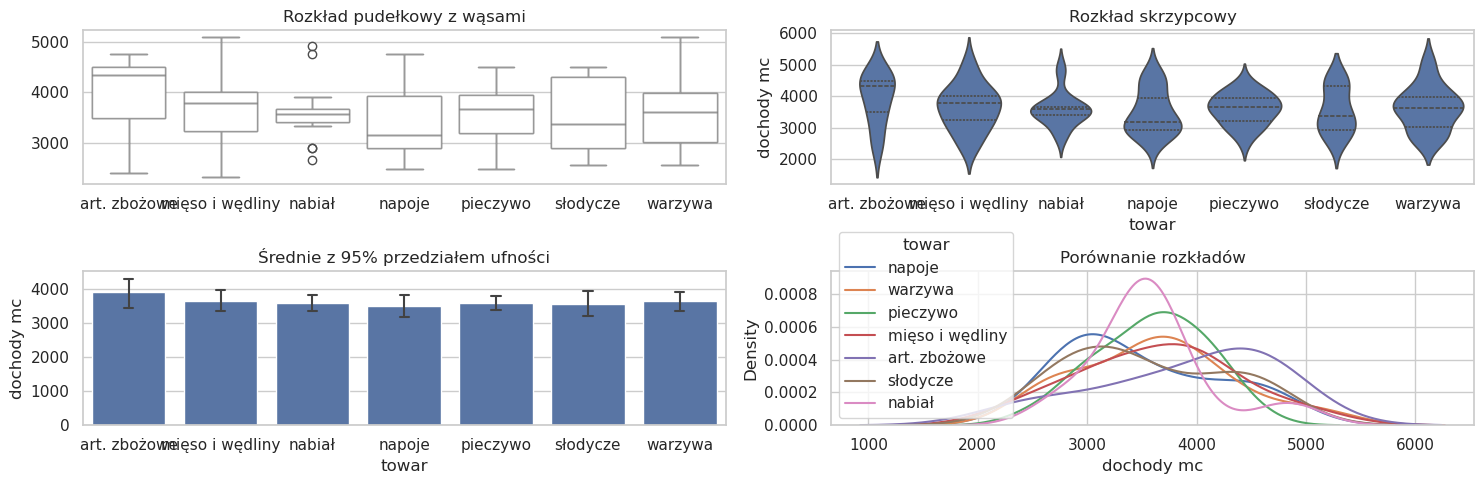

DESCRIPTIVESTATS


,count,mean,std,min,25%,50%,75%,max
towar,,,,,,,,
art. zbożowe,11.00,3894.00,802.71,2417.00,3500.00,4333.00,4500.00,4750.00
mięso i wędliny,20.00,3637.55,720.05,2333.00,3250.00,3791.50,4000.00,5083.00
nabiał,19.00,3579.05,537.51,2667.00,3417.00,3583.00,3667.00,4917.00
napoje,18.00,3495.56,695.05,2500.00,2917.00,3167.00,3937.50,4750.00
pieczywo,23.00,3587.04,502.74,2500.00,3208.50,3667.00,3958.00,4500.00
słodycze,12.00,3550.92,713.92,2583.00,2917.00,3375.00,4312.50,4500.00
warzywa,22.00,3626.18,701.58,2583.00,3021.00,3611.00,3979.25,5083.00
overall,125.00,3611.17,650.23,2333.00,3167.00,3583.00,4000.00,5083.00



Interpretacja: Podstawowe miary tendencji centralnej i rozproszenia dla grup.
NORMALITY


,category,shapiro_p,ks_p,interpretation,H0,HA
0,art. zbożowe,0.04,0.41,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
1,mięso i wędliny,0.84,0.94,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
2,nabiał,0.01,0.25,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
3,napoje,0.03,0.22,Odrzucamy H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
4,pieczywo,0.74,0.96,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
5,słodycze,0.09,0.83,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
6,warzywa,0.19,0.59,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego


VARIANCE


,test,statistic,p_value,interpretation,H0,HA
0,Levene,0.97,0.45,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję
1,Bartlett,5.52,0.48,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję


GROUPTESTS


,test,p_value,interpretation,H0,HA
0,ANOVA,0.83,Brak istotnych różnic,Średnie wszystkich grup są równe,Przynajmniej jedna średnia jest różna
1,Kruskal-Wallis,0.81,Brak istotnych różnic,Rozkłady we wszystkich grupach są identyczne,Przynajmniej jeden rozkład jest różny


POSTHOC

ANALIZA DLA RODZAJ PROMOCJI


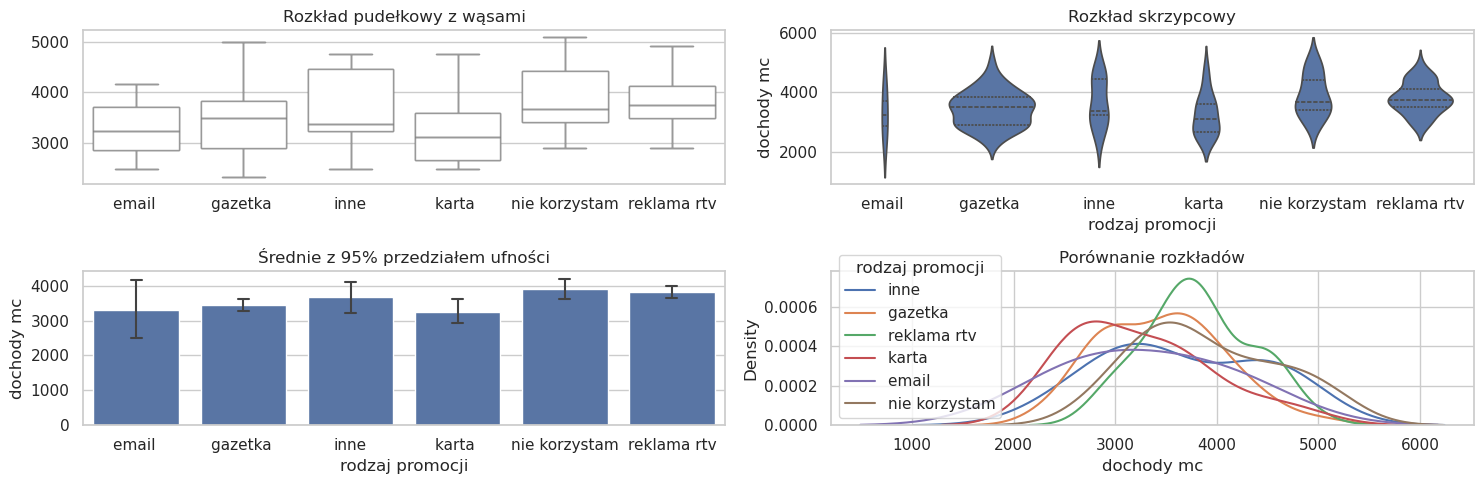

DESCRIPTIVESTATS


,count,mean,std,min,25%,50%,75%,max
rodzaj promocji,,,,,,,,
email,3.00,3305.67,834.89,2500.00,2875.00,3250.00,3708.50,4167.00
gazetka,45.00,3452.53,599.82,2333.00,2917.00,3500.00,3833.00,5000.00
inne,10.00,3666.60,787.65,2500.00,3250.00,3375.00,4458.25,4750.00
karta,14.00,3252.00,681.98,2500.00,2667.00,3125.00,3604.00,4750.00
nie korzystam,19.00,3900.58,687.81,2917.00,3417.00,3667.00,4416.50,5083.00
reklama rtv,34.00,3817.94,515.31,2917.00,3500.00,3750.00,4125.25,4917.00
overall,125.00,3611.17,650.23,2333.00,3167.00,3583.00,4000.00,5083.00



Interpretacja: Podstawowe miary tendencji centralnej i rozproszenia dla grup.
NORMALITY


,category,shapiro_p,ks_p,interpretation,H0,HA
0,email,0.89,1.00,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
1,gazetka,0.42,0.26,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
2,inne,0.23,0.62,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
3,karta,0.09,0.64,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
4,nie korzystam,0.22,0.62,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
5,reklama rtv,0.15,0.45,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego


VARIANCE


,test,statistic,p_value,interpretation,H0,HA
0,Levene,0.87,0.50,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję
1,Bartlett,4.19,0.52,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję


GROUPTESTS


,test,p_value,interpretation,H0,HA
0,ANOVA,0.01,Istotne różnice między grupami,Średnie wszystkich grup są równe,Przynajmniej jedna średnia jest różna
1,Kruskal-Wallis,0.01,Istotne różnice między grupami,Rozkłady we wszystkich grupach są identyczne,Przynajmniej jeden rozkład jest różny


POSTHOC

ANALIZA DLA CZYNNIK ZAKUPOWY


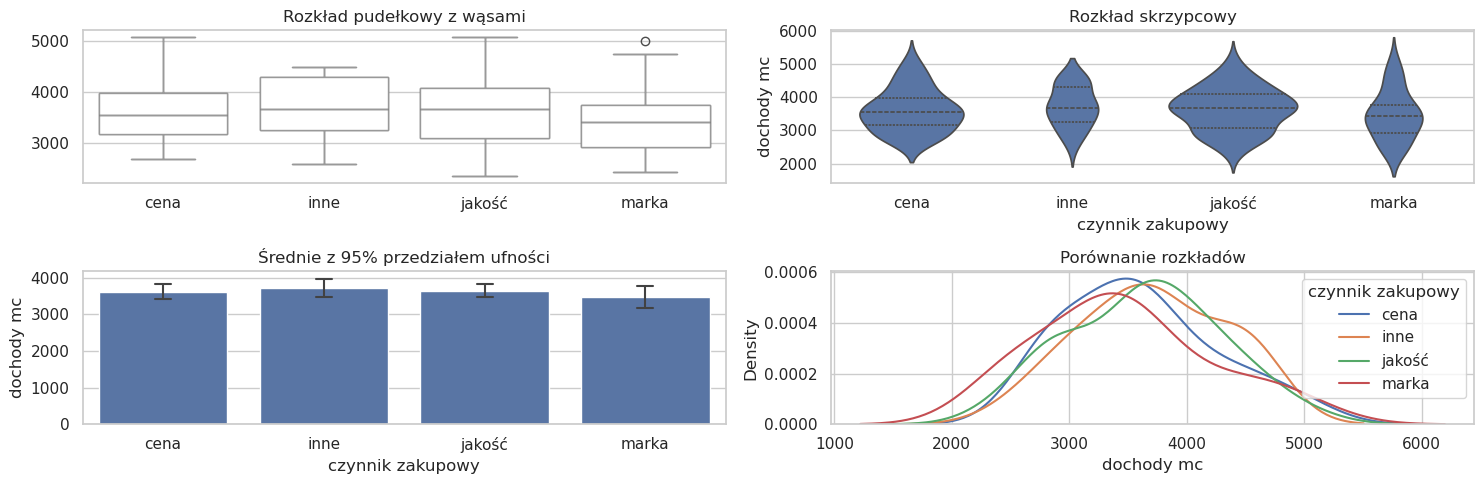

DESCRIPTIVESTATS


,count,mean,std,min,25%,50%,75%,max
czynnik zakupowy,,,,,,,,
cena,38.00,3603.89,643.81,2667.00,3167.00,3541.50,3979.25,5083.00
inne,19.00,3713.42,604.37,2583.00,3250.00,3667.00,4291.50,4500.00
jakość,47.00,3639.57,644.26,2333.00,3083.50,3667.00,4083.50,5083.00
marka,21.00,3468.24,733.31,2417.00,2917.00,3417.00,3750.00,5000.00
overall,125.00,3611.17,650.23,2333.00,3167.00,3583.00,4000.00,5083.00



Interpretacja: Podstawowe miary tendencji centralnej i rozproszenia dla grup.
NORMALITY


,category,shapiro_p,ks_p,interpretation,H0,HA
0,cena,0.12,0.61,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
1,inne,0.13,0.61,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
2,jakość,0.65,0.66,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego
3,marka,0.31,0.66,Brak podstaw do odrzucenia H0,Dane mają rozkład normalny,Dane nie mają rozkładu normalnego


VARIANCE


,test,statistic,p_value,interpretation,H0,HA
0,Levene,0.11,0.95,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję
1,Bartlett,0.80,0.85,Brak podstaw do odrzucenia H0,Wszystkie grupy mają jednakowe wariancje,Przynajmniej jedna grupa ma różną wariancję


GROUPTESTS


,test,p_value,interpretation,H0,HA
0,ANOVA,0.67,Brak istotnych różnic,Średnie wszystkich grup są równe,Przynajmniej jedna średnia jest różna
1,Kruskal-Wallis,0.49,Brak istotnych różnic,Rozkłady we wszystkich grupach są identyczne,Przynajmniej jeden rozkład jest różny


POSTHOC



In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import kruskal, shapiro, levene, bartlett, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

def analyze_categorical_numerical_relationship(df, cat_col, num_col, plot=True, alpha=0.05):
    """
    Kompleksowa analiza związku między zmienną kategoryczną a numeryczną.
    
    Parametry:
    df - ramka danych
    cat_col - nazwa kolumny kategorycznej
    num_col - nazwa kolumny numerycznej
    plot - czy generować wykresy (domyślnie True)
    alpha - poziom istotności (domyślnie 0.05)
    
    Zwraca:
    Słownik z wynikami testów i interpretacjami
    """
    # Inicjalizacja wyników i konwersja na kategorię
    results = {}
    df = df.copy()
    df[cat_col] = df[cat_col].astype('category')
    categories = df[cat_col].cat.categories
    groups = [df[df[cat_col] == cat][num_col] for cat in categories]

    # 1. Statystyki opisowe
    def get_descriptive_stats():
        stats = df.groupby(cat_col)[num_col].describe()
        stats.loc['overall'] = df[num_col].describe()
        return stats
    
    results['descriptive_stats'] = {
        'table': get_descriptive_stats(),
        'interpretation': "Podstawowe miary tendencji centralnej i rozproszenia dla grup."
    }

    # 2. Testy normalności
    def check_normality():
        normality = []
        for cat, group in zip(categories, groups):
            if len(group) < 3:
                normality.append({
                    'category': cat,
                    'shapiro_p': np.nan,
                    'ks_p': np.nan,
                    'interpretation': 'Za mało danych (n < 3)',
                    'H0': 'Dane mają rozkład normalny',
                    'HA': 'Dane nie mają rozkładu normalnego'
                })
                continue
                
            shapiro_p = shapiro(group)[1]
            ks_p = kstest(group, 'norm', args=(group.mean(), group.std()))[1]
            rejected = any(p < alpha for p in [shapiro_p, ks_p] if not pd.isnull(p))
            
            normality.append({
                'category': cat,
                'shapiro_p': shapiro_p,
                'ks_p': ks_p,
                'interpretation': 'Odrzucamy H0' if rejected else 'Brak podstaw do odrzucenia H0',
                'H0': 'Dane mają rozkład normalny',
                'HA': 'Dane nie mają rozkładu normalnego'
            })
        return pd.DataFrame(normality)
    
    results['normality'] = check_normality()

    # 3. Testy równości wariancji
    def check_variance_homogeneity():
        tests = []
        for name, test in [('Levene', levene), ('Bartlett', bartlett)]:
            try:
                stat, p = test(*groups)[:2]
                tests.append({
                    'test': name,
                    'statistic': stat,
                    'p_value': p,
                    'interpretation': 'Odrzucamy H0' if p < alpha else 'Brak podstaw do odrzucenia H0',
                    'H0': 'Wszystkie grupy mają jednakowe wariancje',
                    'HA': 'Przynajmniej jedna grupa ma różną wariancję'
                })
            except Exception as e:
                tests.append({
                    'test': name,
                    'error': str(e)
                })
        return pd.DataFrame(tests)
    
    results['variance'] = check_variance_homogeneity()

    # 4. Testy istotności różnic
    def perform_group_tests():
        tests = []
        n_categories = len(categories)

        # Dodany test t-Studenta dla dwóch grup
        if n_categories == 2:
            # Sprawdzenie równości wariancji
            levene_p = results['variance'].loc[results['variance']['test'] == 'Levene', 'p_value'].values[0]
            equal_var = levene_p > alpha
            
            # Wybór wersji testu
            test_name = "Student's t-test" if equal_var else "Welch's t-test"
            
            # Wykonanie testu t-Studenta
            t_stat, t_p = ttest_ind(groups[0], groups[1], equal_var=equal_var)
            
            tests.append({
                'test': test_name,
                'statistic': t_stat,
                'p_value': t_p,
                'interpretation': 'Istotna różnica między grupami' if t_p < alpha else 'Brak istotnej różnicy',
                'H0': 'Średnie obu grup są równe',
                'HA': 'Średnie grup są różne',
                'assumptions': f'Równe wariancje: {"Tak" if equal_var else "Nie"}'
            })

        # ANOVA dla wielu grup
        try:
            anova = pg.anova(dv=num_col, between=cat_col, data=df, detailed=True)
            anova_result = {
                'test': 'ANOVA',
                'p_value': anova.loc[0, 'p-unc'],
                'interpretation': ('Istotne różnice między grupami' 
                                   if anova.loc[0, 'p-unc'] < alpha else 
                                   "Brak istotnych różnic"),
                'H0': 'Średnie wszystkich grup są równe',
                'HA': 'Przynajmniej jedna średnia jest różna'
            }
            tests.append(anova_result)
        except Exception as e:
            tests.append({'test': 'ANOVA', 'error': str(e)})

        # Test Kruskala-Wallisa
        try:
            h_stat, p_kw = kruskal(*groups)
            tests.append({
                'test': 'Kruskal-Wallis',
                'p_value': p_kw,
                'interpretation': ('Istotne różnice między grupami' 
                                   if p_kw < alpha else 
                                   "Brak istotnych różnic"),
                'H0': 'Rozkłady we wszystkich grupach są identyczne',
                'HA': 'Przynajmniej jeden rozkład jest różny'
            })
        except Exception as e:
            tests.append({'test': 'Kruskal-Wallis', 'error': str(e)})

        return pd.DataFrame(tests)
    
    results['group_tests'] = perform_group_tests()

    # 5. Analiza post-hoc
    def posthoc_analysis():
        if len(categories) == 2:
            return {
                **results['group_tests'].iloc[-1].to_dict(),  # Dodanie wyników testu t-Studenta do wyników
                **{
                    "results": "Wykorzystano test t-Studenta",
                    "interpretation": results['group_tests'].iloc[-1]['interpretation']
                }
            }
        else:
            try:
                tukey_test = pairwise_tukeyhsd(endog=df[num_col], groups=df[cat_col], alpha=alpha)
                return {
                    **{
                        "results": tukey_test,
                        "interpretation": ('Pary grup ze statystycznie istotnymi różnicami' 
                                           if any(tukey_test.reject) else 
                                           "Brak istotnych różnic między grupami"),
                        "H0": "Brak różnicy między średnimi grup",
                        "HA": "Istnieje różnica między średnimi grup"
                    }
                }
            except Exception as e:
                return {'error': str(e)}
    
    results['posthoc'] = posthoc_analysis()

    # Wizualizacja
    def generate_plots(df, cat_col, num_col):
 
        fig, axes = plt.subplots(2, 2, figsize=(15, 5))
        
        # Wykres pudełkowy
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[0, 0])
        sns.boxplot(x=cat_col, y=num_col, data=df, showfliers=False, color='white', linewidth=1, ax=axes[0, 0])
        axes[0, 0].set_title('Rozkład pudełkowy z wąsami')
        axes[0, 0].set_xlabel('')
        axes[0, 0].set_ylabel('')
        axes[0, 0].tick_params(left=False, bottom=False)
        # Wykres skrzypcowy
        sns.violinplot(x=cat_col, y=num_col, data=df, inner='quartile', scale='count', ax=axes[0, 1])
        axes[0, 1].set_title('Rozkład skrzypcowy')
        
        # Średnie z 95% przedziałem ufności
        sns.barplot(x=cat_col, y=num_col, data=df, ci=95, capsize=0.1, errwidth=1.5, ax=axes[1, 0])
        axes[1, 0].set_title('Średnie z 95% przedziałem ufności')
        
        # Porównanie rozkładów
        categories = df[cat_col].unique()
        for category in categories:
            sns.kdeplot(df[df[cat_col] == category][num_col], fill=False, label=category, ax=axes[1, 1])
        axes[1, 1].set_title('Porównanie rozkładów')
        axes[1, 1].legend(title=cat_col)
        
        plt.tight_layout()
        plt.show()
   

    if plot:
        generate_plots(df, cat_col, num_col)

    # Prezentacja wyników
    for section in results:
        print(f"{section.upper().replace('_', '').replace('TESTY GRUPOWE', '')}")
        
        if isinstance(results[section], dict) and ('table' in results[section] or 
                                                    isinstance(results[section]['results'], pd.DataFrame)):
            display(results[section]['table'] if isinstance(results[section], dict) and 
                   ('table' in results[section]) else results[section]['results'])
            
            print(f"\nInterpretacja: {results[section]['interpretation']}")
            
        elif isinstance(results[section], pd.DataFrame):
            display(results[section])
            
    return results


def display_analysis_title(title):
    print(title.upper())

# Przykład użycia funkcji z przykładową ramką danych `baza`
for cat_col in ["typ sklepu", "towar", "rodzaj promocji", "czynnik zakupowy"]:
    display_analysis_title(f"Analiza dla zmiennej : {cat_col}")
    display(results = analyze_categorical_numerical_relationship(baza, cat_col, "dochody mc"))
    print()